In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
big_dataset= pd.read_csv('/content/drive/MyDrive/Computer Engineering /Three_main_dataset/merged_df.csv')

In [ ]:
dataset_onlycve=pd.read_csv('/content/drive/MyDrive/Computer Engineering /Three_main_dataset/merged_df_new_noEmptyCVE.csv')

In [ ]:
dataset_withemptycve=pd.read_csv('/content/drive/MyDrive/Computer Engineering /Three_main_dataset/merged_df_withCVEcount.csv')

In [ ]:
big_dataset

,ReleaseID,Popularity,Freshness,numberMissedRelease,outdatedTimeInMs,CVE,Artifact,artifact,Timestamp
0,HTTPClient:HTTPClient:0.3-3,0,"{'numberMissedRelease': '0', 'outdatedTimeInMs...",0,0,"{\\""cve\\"":[]}",HTTPClient,HTTPClient:HTTPClient,1122887875000
1,abbot:abbot:0.12.3,0,"{'numberMissedRelease': '2', 'outdatedTimeInMs...",2,320049365000,"{\\""cve\\"":[]}",abbot,abbot:abbot,1122887876000
2,abbot:abbot:0.13.0,0,"{'numberMissedRelease': '1', 'outdatedTimeInMs...",1,320049364000,"{\\""cve\\"":[]}",abbot,abbot:abbot,1122887877000
3,abbot:abbot:1.4.0,0,"{'numberMissedRelease': '0', 'outdatedTimeInMs...",0,0,"{\\""cve\\"":[]}",abbot,abbot:abbot,1442937241000
4,abbot:costello:1.4.0,0,"{'numberMissedRelease': '0', 'outdatedTimeInMs...",0,0,"{\\""cve\\"":[]}",costello,abbot:costello,1443086506000
...,...,...,...,...,...,...,...,...,...
14459134,zone.wmj:user-agent-util:1.2.9,0,"{'numberMissedRelease': '2', 'outdatedTimeInMs...",2,8373804000,"{\\""cve\\"":[]}",user-agent-util,zone.wmj:user-agent-util,1646991701000
14459135,zone.wmj:user-agent-util:2.0.0,0,"{'numberMissedRelease': '0', 'outdatedTimeInMs...",0,0,"{\\""cve\\"":[]}",user-agent-util,zone.wmj:user-agent-util,1655365505000
14459136,zw.co.paynow:java-sdk:1.0.0,0,"{'numberMissedRelease': '2', 'outdatedTimeInMs...",2,11996676000,"{\\""cve\\"":[]}",java-sdk,zw.co.paynow:java-sdk,1548509171000
14459137,zw.co.paynow:java-sdk:1.1.0,0,"{'numberMissedRelease': '1', 'outdatedTimeInMs...",1,6831477000,"{\\""cve\\"":[]}",java-sdk,zw.co.paynow:java-sdk,1553674370000


<ipython-input-124-89124739f8a4>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Year', y='Time Gap (Days)', data=big_dataset, boxprops=dict(linewidth=2, facecolor='none'), palette="muted")


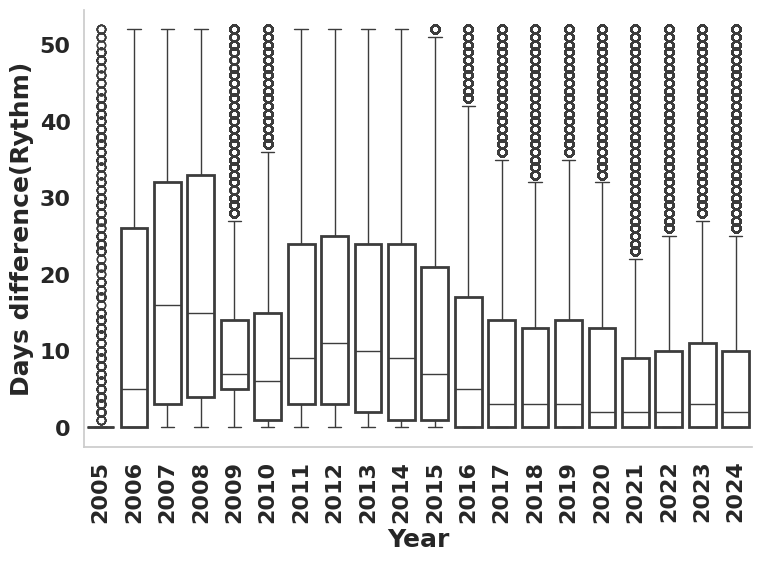

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the 'Timestamp' column is in numeric format
big_dataset['Timestamp'] = pd.to_numeric(big_dataset['Timestamp'], errors='coerce')

# Convert 'Timestamp' from Unix milliseconds to datetime format
big_dataset['Timestamp'] = pd.to_datetime(big_dataset['Timestamp'], unit='ms')

# Extract Year from 'Timestamp' for grouping
big_dataset['Year'] = big_dataset['Timestamp'].dt.year

# Sort the dataset by 'artifact' and 'Timestamp' in chronological order
big_dataset = big_dataset.sort_values(by=['artifact', 'Timestamp'], ascending=[True, True])

# Calculate the time gap between consecutive releases in days
big_dataset['Time Gap (Days)'] = big_dataset.groupby('artifact')['Timestamp'].diff().dt.days

# Define a function to remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply the outlier removal to the 'Time Gap (Days)' column
big_dataset = remove_outliers(big_dataset, 'Time Gap (Days)')

# Set up the plot style without grid and box
sns.set(style="whitegrid", font_scale=1.6)

# Create the boxplot for 'Time Gap (Days)' by 'Year'
plt.figure(figsize=(8, 6))  # Increased figure size for more space
sns.boxplot(x='Year', y='Time Gap (Days)', data=big_dataset, boxprops=dict(linewidth=2, facecolor='none'), palette="muted")

# Remove grid and axes box
plt.grid(False)
sns.despine()

# Set axis labels with bold font and adjusted font sizes
plt.ylabel('Days difference(Rythm)', fontsize=18, fontweight='bold')
plt.xlabel('Year', fontsize=18, fontweight='bold')

# Rotate x-axis labels, adjust font size for axis ticks, and adjust layout
plt.xticks(rotation=90, fontsize=16, fontweight='bold')
plt.yticks(fontsize=16, fontweight='bold')
plt.tight_layout()

# Save the plot with high resolution
plt.savefig('boxplot_publication_quality_bigger.png', dpi=2400, bbox_inches='tight')

# Show the plot
plt.show()


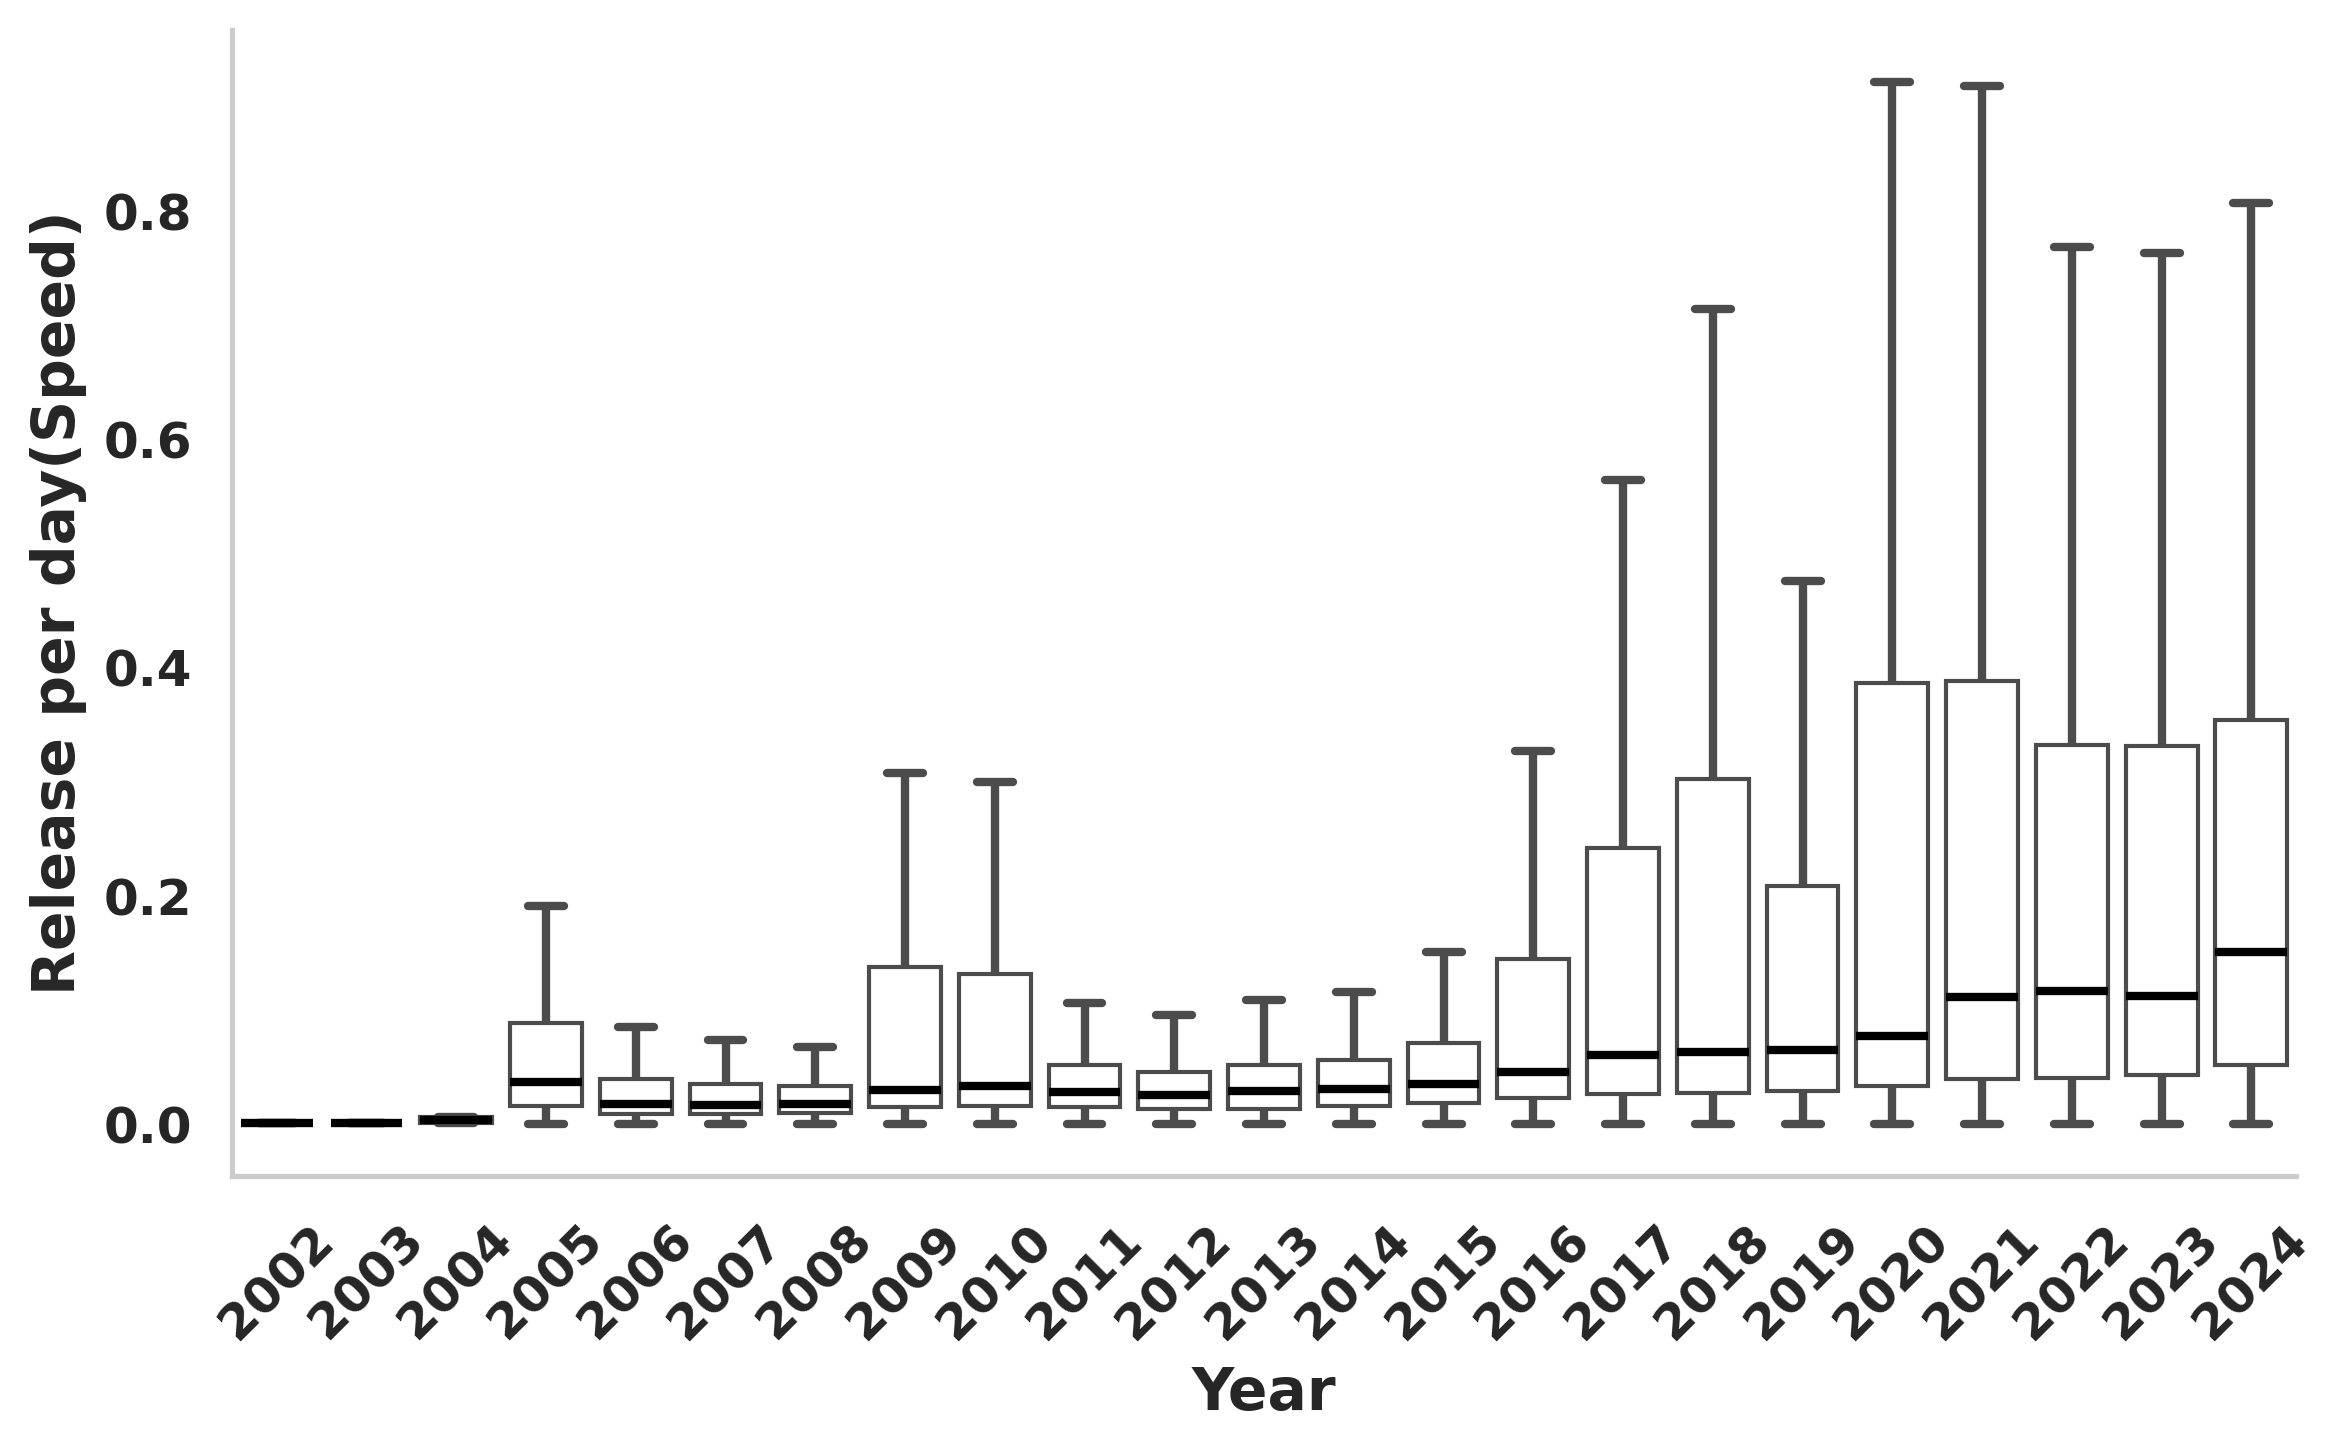

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")


# Ensure the 'Timestamp' column is in numeric format
big_dataset['Timestamp'] = pd.to_numeric(big_dataset['Timestamp'], errors='coerce')

# Convert 'Timestamp' from Unix milliseconds to datetime format
big_dataset['Timestamp'] = pd.to_datetime(big_dataset['Timestamp'], unit='ms')

# Extract Year from 'Timestamp' for grouping
big_dataset['Year'] = big_dataset['Timestamp'].dt.year

# Sort the dataset by 'artifact' and 'Timestamp' in chronological order
big_dataset = big_dataset.sort_values(by=['artifact', 'Timestamp'], ascending=[True, True])

# Calculate the time gap between the first and last timestamps per artifact
artifact_speed = big_dataset.groupby('artifact').agg(
    first_timestamp=('Timestamp', 'first'),
    last_timestamp=('Timestamp', 'last'),
    total_releases=('Timestamp', 'count')
)

# Calculate the gap in days between the first and last timestamp
artifact_speed['Gap (Days)'] = (artifact_speed['last_timestamp'] - artifact_speed['first_timestamp']).dt.days

# Calculate releases per day (speed)
artifact_speed['Releases per Day'] = artifact_speed['total_releases'] / artifact_speed['Gap (Days)']

# Merge the speed data back into the original dataframe
big_dataset = big_dataset.merge(artifact_speed[['Releases per Day']], on='artifact', how='left')

# Create the boxplot for 'Releases per Day' by 'Year'
plt.figure(figsize=(8, 5), dpi=300)  # Small size with high resolution for publication

# Create the boxplot for 'Releases per Day' by 'Year'
boxplot = sns.boxplot(x='Year', y='Releases per Day', data=big_dataset,
                      showcaps=True, boxprops={'facecolor':'None'},
                      whiskerprops={'linewidth':2}, capprops={'linewidth':2},
                      medianprops={'color':'black', 'linewidth':2},
                      showfliers=False)

# Add error bars (whiskers) on both sides
for i, artist in enumerate(boxplot.artists):
    # Extract the data for the current box
    box = boxplot.artists[i]
    # Change the color of the box to white (no fill)
    box.set_edgecolor('black')
    box.set_linewidth(2)

    # Whiskers
    for j in range(2):
        line = boxplot.lines[2 * i + j]
        line.set_color('black')
        line.set_linewidth(2)

    # Caps (the top and bottom line segments)
    for j in range(2):
        line = boxplot.lines[2 * (len(boxplot.artists) + i) + j]
        line.set_color('black')
        line.set_linewidth(2)

# Customize the plot
plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Release per day(Speed)', fontsize=14, fontweight='bold')

# Bold the ticks on x and y axes
plt.xticks(rotation=45, fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

# Remove the grid
plt.grid(False)

# Remove the box around the plot
sns.despine()

# Adjust the appearance for publication quality
plt.tight_layout()

# Save the plot with high resolution for publication
plt.savefig('boxplot_publication_quality.png', dpi=2400)

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import json


def count_cves(cve_entry):
    # Replace escaped backslashes and fix quotes
    cleaned_entry = cve_entry.replace('\\"', '"').replace('\\', '')

    try:
        # Load the JSON data
        cve_data = json.loads(cleaned_entry)
        # Return the count of CVEs
        return len(cve_data.get("cve", []))
    except json.JSONDecodeError as e:
        print(f"JSON decode error for entry: {cleaned_entry} - Error: {e}")
        return 0
    except Exception as e:
        print(f"Error processing entry: {cleaned_entry} - Error: {e}")
        return 0

dataset_onlycve['CVE_count'] = dataset_onlycve['CVE'].apply(count_cves)

# Display results
dataset_onlycve[['CVE', 'CVE_count']].head(10)


,CVE,CVE_count
0,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-22]\\"",\\""sever...",1
1,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-22]\\"",\\""sever...",1
2,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-22]\\"",\\""sever...",1
3,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-22]\\"",\\""sever...",1
4,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-22]\\"",\\""sever...",1
5,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-22]\\"",\\""sever...",1
6,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-22]\\"",\\""sever...",1
7,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-22]\\"",\\""sever...",1
8,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-22]\\"",\\""sever...",1
9,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-22]\\"",\\""sever...",1


In [ ]:
dataset_onlycve.tail(5)

,ReleaseID,Popularity,Freshness,numberMissedRelease,outdatedTimeInMs,CVE,Artifact,artifact,Timestamp,CVE_count,...,CRITICAL,Common Score,Total Contribution,Year,Contribution_Binned,outdatedTimeInDays,LOW,MEDIUM,HIGH,CRITICAL
77388,xerces:xercesImpl:2.7.1,0,"{'numberMissedRelease': '11', 'outdatedTimeInM...",11,510594550000,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-91]\\"",\\""sever...",xercesImpl,xerces:xercesImpl,1132684112000000000,5,...,0,6.5,32.5,2005,>30,5909.659144,0,3,2,0
77389,xerces:xercesImpl:2.8.0,18,"{'numberMissedRelease': '9', 'outdatedTimeInMs...",9,498577537000,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-91]\\"",\\""sever...",xercesImpl,xerces:xercesImpl,1144701125000000000,5,...,0,6.5,32.5,2006,>30,5770.573345,0,3,2,0
77390,xerces:xercesImpl:2.8.1,19,"{'numberMissedRelease': '8', 'outdatedTimeInMs...",8,483056110000,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-91]\\"",\\""sever...",xercesImpl,xerces:xercesImpl,1160222552000000000,5,...,0,6.5,32.5,2006,>30,5590.927199,0,3,2,0
77391,xerces:xercesImpl:2.9.0,0,"{'numberMissedRelease': '7', 'outdatedTimeInMs...",7,420379122000,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-91]\\"",\\""sever...",xercesImpl,xerces:xercesImpl,1222899540000000000,5,...,0,6.5,32.5,2008,>30,4865.499097,0,3,2,0
77392,xerces:xercesImpl:2.9.1,21,"{'numberMissedRelease': '6', 'outdatedTimeInMs...",6,420379099000,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-91]\\"",\\""sever...",xercesImpl,xerces:xercesImpl,1222899563000000000,5,...,0,6.5,32.5,2008,>30,4865.498831,0,3,2,0


In [ ]:
import pandas as pd
import json

# Function to extract CVE names, severity, and entire JSON-like entry
def extract_cve_entries_with_severity(cve_entry):
    # Clean the escaped backslashes and quotes
    cleaned_entry = cve_entry.replace('\\"', '"').replace('\\', '')

    try:
        # Load the cleaned JSON data
        cve_data = json.loads(cleaned_entry)

        # Extract each CVE's name and severity along with the entire entry
        cve_entries = [(cve.get("name", ""), cve.get("severity", ""), cve) for cve in cve_data.get("cve", [])]

        return cve_entries
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")
        return []

# Apply the function to extract CVE names, severity, and associated entries
dataset_onlycve['cve_entries'] = dataset_onlycve['CVE'].apply(extract_cve_entries_with_severity)

# Flatten the list of CVE entries across all rows, keeping the (CVE ID, severity, entry) pairs
all_cve_entries = [entry for sublist in dataset_onlycve['cve_entries'] for entry in sublist]

# Convert to DataFrame for easier viewing
cve_entries_df = pd.DataFrame(all_cve_entries, columns=['CVE_ID', 'Severity', 'CVE_Entry'])

# Count the occurrences of each CVE ID
cve_counts = cve_entries_df['CVE_ID'].value_counts()

# Display the top 10 most frequent CVEs with their severity and full entries
top_10_cves = cve_counts.head(10)

# Get the full entries for the top 10 CVEs
top_10_cve_entries = cve_entries_df[cve_entries_df['CVE_ID'].isin(top_10_cves.index)]

# Count the occurrences of each severity for top 10 CVEs
severity_counts = top_10_cve_entries.groupby(['CVE_ID', 'Severity']).size().reset_index(name='Frequency')

# Display the result
severity_counts.sort_values(by=[ 'Frequency'])


,CVE_ID,Severity,Frequency
13,UNKNOWN,UNKNOWN,12
9,UNKNOWN,CRITICAL,358
6,CVE-2023-4853,HIGH,716
1,CVE-2022-22965,CRITICAL,758
0,BIT-apisix-2023-44487,MODERATE,855
4,CVE-2023-28465,HIGH,1133
3,CVE-2023-24057,CRITICAL,1138
2,CVE-2022-31159,HIGH,1420
11,UNKNOWN,LOW,1424
10,UNKNOWN,HIGH,1502


In [ ]:
import requests
import pandas as pd

def fetch_cve_info(cve_ids):
    base_url = "https://services.nvd.nist.gov/rest/json/cve/1.0/"
    cve_data = []

    for cve_id in cve_ids:
        try:
            response = requests.get(base_url + cve_id)
            print(f"Fetching data for {cve_id}: Status Code {response.status_code}")  # Debugging line
            if response.status_code == 200:
                cve_json = response.json()
                # Check if the result contains CVE_Items
                items = cve_json.get("result", {}).get("CVE_Items", [])
                if items:
                    cve_description = items[0].get("cve", {}).get("description", {}).get("description_data", [])[0].get("value", "")
                    impact = items[0].get("impact", {}).get("baseMetricV3", {}).get("cvssV3", {})
                    severity = impact.get("baseSeverity", "N/A")
                    score = impact.get("baseScore", "N/A")
                    cve_data.append({
                        "CVE ID": cve_id,
                        "Severity": severity,
                        "Score": score,
                        "Description": cve_description
                    })
                else:
                    cve_data.append({"CVE ID": cve_id, "Severity": "N/A", "Score": "N/A", "Description": "No data found"})
            else:
                cve_data.append({"CVE ID": cve_id, "Severity": "N/A", "Score": "N/A", "Description": "API error"})
        except Exception as e:
            cve_data.append({"CVE ID": cve_id, "Severity": "Error", "Score": "Error", "Description": str(e)})

    return pd.DataFrame(cve_data)

# List of CVE IDs to fetch
cve_ids = [
    "CVE-2023-24057",
    "CVE-2022-31159",
    "CVE-2023-32070",
    "CVE-2023-6835",
    "CVE-2023-6837"
]

# Fetch and display the table
cve_table = fetch_cve_info(cve_ids)
print(cve_table)

# Save to Excel
cve_table.to_excel("CVE_Details_Debug.xlsx", index=False)


Fetching data for CVE-2023-24057: Status Code 403
Fetching data for CVE-2022-31159: Status Code 403
Fetching data for CVE-2023-32070: Status Code 403
Fetching data for CVE-2023-6835: Status Code 403
Fetching data for CVE-2023-6837: Status Code 403
           CVE ID Severity Score Description
0  CVE-2023-24057      N/A   N/A   API error
1  CVE-2022-31159      N/A   N/A   API error
2  CVE-2023-32070      N/A   N/A   API error
3   CVE-2023-6835      N/A   N/A   API error
4   CVE-2023-6837      N/A   N/A   API error


In [ ]:
import pandas as pd
import json


# Function to process CVE entries and count severities
def count_severities(cve_entry):
    # Replace escaped backslashes and fix quotes
    cleaned_entry = cve_entry.replace('\\"', '"').replace('\\', '')

    try:
        # Load the JSON data
        cve_data = json.loads(cleaned_entry)
        # Extract individual CVEs
        cves = cve_data.get("cve", [])

        # Count severities
        severity_counts = {"LOW": 0, "MEDIUM": 0, "HIGH": 0, "CRITICAL": 0}
        for cve in cves:
            severity = cve.get("severity", "").upper()
            if severity == "MODERATE":  # Map MODERATE to MEDIUM
                severity = "MEDIUM"
            if severity in severity_counts:
                severity_counts[severity] += 1

        return severity_counts
    except json.JSONDecodeError as e:
        print(f"JSON decode error for entry: {cleaned_entry} - Error: {e}")
        return {"LOW": 0, "MEDIUM": 0, "HIGH": 0, "CRITICAL": 0}
    except Exception as e:
        print(f"Error processing entry: {cleaned_entry} - Error: {e}")
        return {"LOW": 0, "MEDIUM": 0, "HIGH": 0, "CRITICAL": 0}

# Apply the function to the CVE column
dataset_onlycve["severity_counts"] = dataset_onlycve["CVE"].apply(count_severities)

# Expand the severity_counts dictionary into separate columns
severity_df = pd.json_normalize(dataset_onlycve["severity_counts"])
dataset_onlycve = pd.concat([dataset_onlycve, severity_df], axis=1)

# Drop the combined dictionary column if not needed
dataset_onlycve.drop(columns=["severity_counts"], inplace=True)

# Display the result
dataset_onlycve


,ReleaseID,Popularity,Freshness,numberMissedRelease,outdatedTimeInMs,CVE,Artifact,artifact,Timestamp,CVE_count,...,CRITICAL,LOW,MEDIUM,HIGH,CRITICAL,Time Gap (Days),LOW,MEDIUM,HIGH,CRITICAL
11,ai.djl:api:0.2.1,0.0,"{'numberMissedRelease': '29', 'outdatedTimeInM...",29.0,1.422089e+11,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-22]\\"",\\""sever...",api,ai.djl:api,2020-01-15 19:03:50,1.0,...,1.0,0.0,0.0,0.0,1.0,48.0,0.0,0.0,0.0,1.0
21,ai.djl:api:0.3.0,0.0,"{'numberMissedRelease': '28', 'outdatedTimeInM...",28.0,1.389874e+11,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-22]\\"",\\""sever...",api,ai.djl:api,2020-02-22 01:55:50,1.0,...,1.0,0.0,0.0,0.0,1.0,37.0,0.0,0.0,0.0,1.0
22,ai.djl:api:0.4.0,0.0,"{'numberMissedRelease': '27', 'outdatedTimeInM...",27.0,1.359669e+11,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-22]\\"",\\""sever...",api,ai.djl:api,2020-03-28 00:56:35,1.0,...,1.0,0.0,0.0,0.0,1.0,34.0,0.0,0.0,0.0,1.0
23,ai.djl:api:0.4.1,0.0,"{'numberMissedRelease': '26', 'outdatedTimeInM...",26.0,1.353872e+11,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-22]\\"",\\""sever...",api,ai.djl:api,2020-04-03 17:58:57,1.0,...,1.0,0.0,0.0,0.0,1.0,6.0,0.0,0.0,0.0,1.0
24,ai.djl:api:0.5.0,0.0,"{'numberMissedRelease': '25', 'outdatedTimeInM...",25.0,1.320160e+11,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-22]\\"",\\""sever...",api,ai.djl:api,2020-05-12 18:24:47,1.0,...,1.0,0.0,0.0,0.0,1.0,39.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68844,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,4.0,0.0,0.0
68845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,4.0,0.0,0.0
68846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,4.0,0.0,0.0
68851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3.0,0.0,0.0


In [ ]:
print(dataset_onlycve['CRITICAL'].sum())
print(dataset_onlycve['HIGH'].sum())
print(dataset_onlycve['MEDIUM'].sum())
print(dataset_onlycve['LOW'].sum())

33583
70316
65964
9010


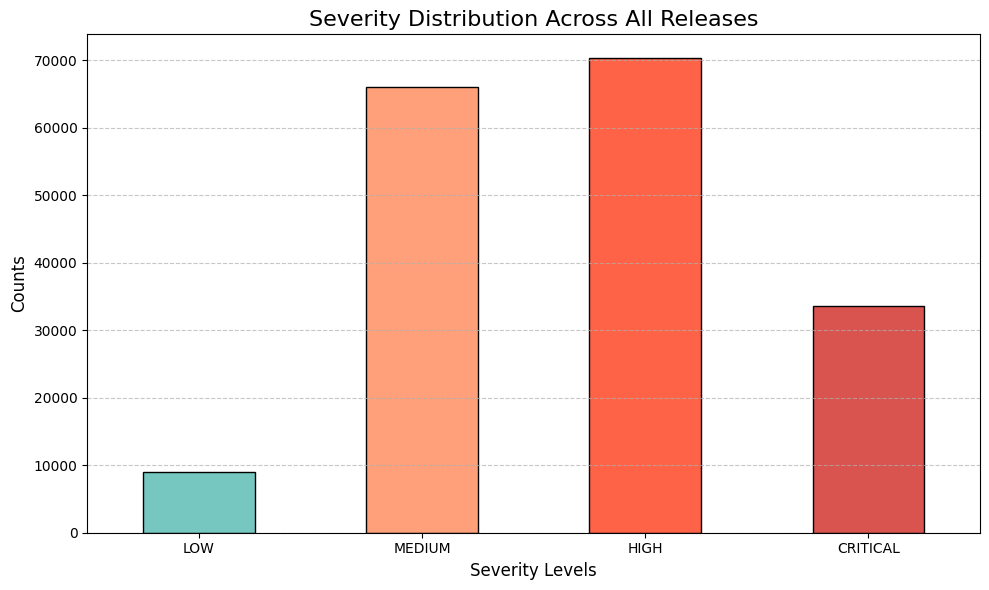

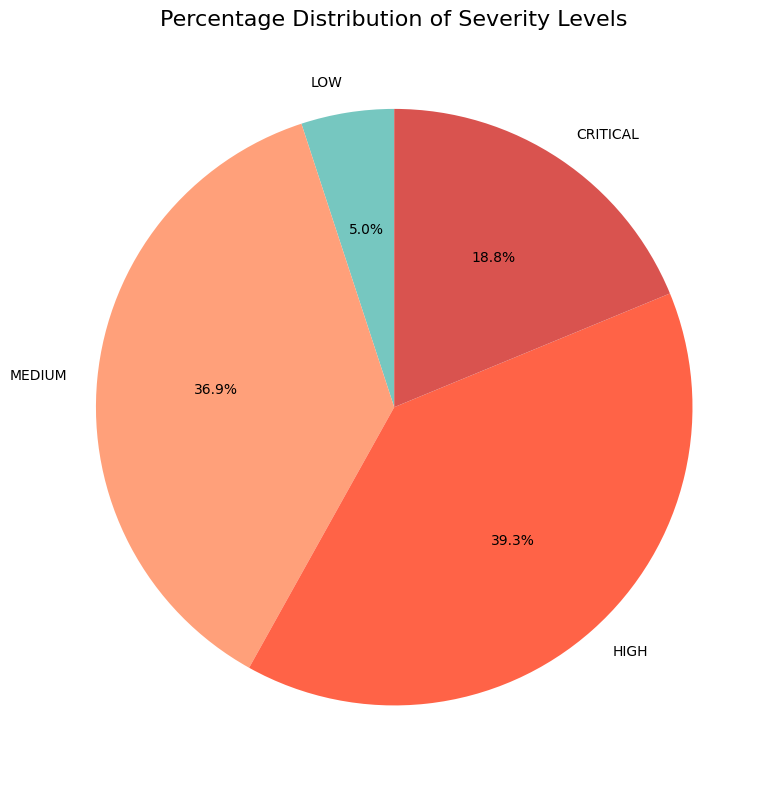

In [ ]:
!pip install matplotlib pandas

# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

# Sum the counts of each severity across all releases
severity_counts = dataset_onlycve[['LOW', 'MEDIUM', 'HIGH', 'CRITICAL']].sum()

# Bar Chart for Severity Distribution
plt.figure(figsize=(10, 6))
severity_counts.plot(kind='bar', color=['#76c7c0', '#ffa07a', '#ff6347', '#d9534f'], edgecolor='black')
plt.title('Severity Distribution Across All Releases', fontsize=16)
plt.xlabel('Severity Levels', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Pie Chart for Severity Percentage Distribution
plt.figure(figsize=(8, 8))
severity_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=['#76c7c0', '#ffa07a', '#ff6347', '#d9534f'],
    labels=['LOW', 'MEDIUM', 'HIGH', 'CRITICAL']
)
plt.title('Percentage Distribution of Severity Levels', fontsize=16)
plt.ylabel('')  # Remove y-axis label for a cleaner look
plt.tight_layout()
plt.show()


<ipython-input-14-5fe6f7f29d23>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


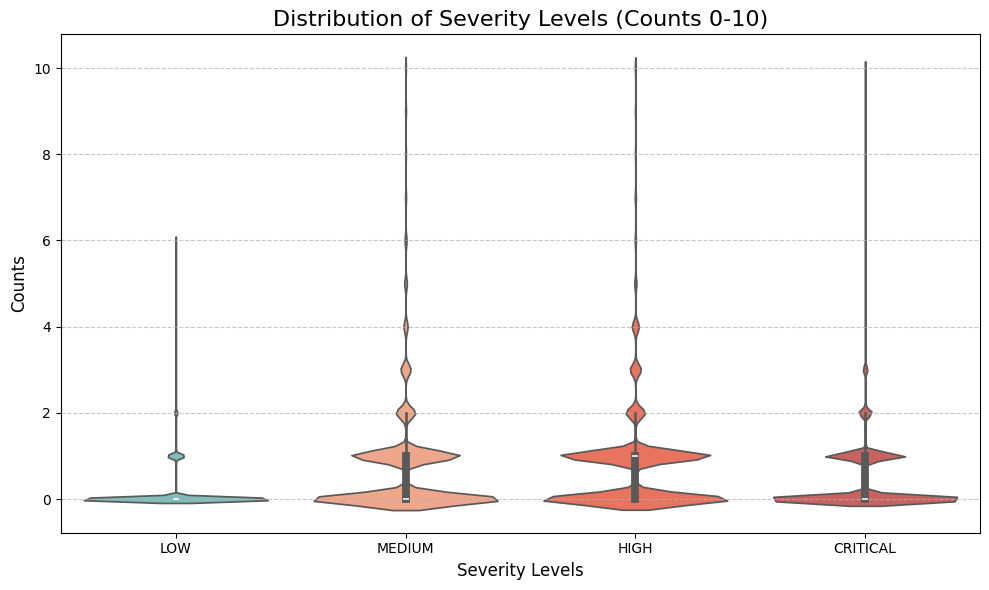

In [ ]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for plotting
severity_columns = ['LOW', 'MEDIUM', 'HIGH', 'CRITICAL']
severity_data = pd.melt(
    dataset_onlycve[severity_columns],
    var_name='Severity Level',
    value_name='Counts'
)

# Filter for counts between 0 and 10
severity_data = severity_data[severity_data['Counts'].between(0, 10)]

# Violin Plot for Severity Distribution (0-10 Counts)
plt.figure(figsize=(10, 6))
sns.violinplot(
    x='Severity Level',
    y='Counts',
    data=severity_data,
    palette=['#76c7c0', '#ffa07a', '#ff6347', '#d9534f']
)
plt.title('Distribution of Severity Levels (Counts 0-10)', fontsize=16)
plt.xlabel('Severity Levels', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
#https://ieeexplore.ieee.org/abstract/document/10397701?casa_token=poimuetCywQAAAAA:qGz-uYD084dgcJz9cyjiPdBG7ktMZ9vLSaEDRsIHSpM3WzOgOE0j5OcQv0l5_33YrUto1H5Btg

# Define base scores for severity levels
base_scores = {'LOW': 3.0, 'MEDIUM': 5.5, 'HIGH': 8.0, 'CRITICAL': 9.5, 'NONE': 0.0}

# Calculate a weighted average score for each artifact
dataset_onlycve['Common Score'] = (
    dataset_onlycve['LOW'] * base_scores['LOW'] +
    dataset_onlycve['MEDIUM'] * base_scores['MEDIUM'] +
    dataset_onlycve['HIGH'] * base_scores['HIGH'] +
    dataset_onlycve['CRITICAL'] * base_scores['CRITICAL']
) / dataset_onlycve[['LOW', 'MEDIUM', 'HIGH', 'CRITICAL']].sum(axis=1)

# Fill NaN values with 0 for artifacts without vulnerabilities
dataset_onlycve['Common Score'] = dataset_onlycve['Common Score'].fillna(0)



In [ ]:
# https://ieeexplore.ieee.org/abstract/document/10397701?casa_token=poimuetCywQAAAAA:qGz-uYD084dgcJz9cyjiPdBG7ktMZ9vLSaEDRsIHSpM3WzOgOE0j5OcQv0l5_33YrUto1H5Btg

# Define base scores for severity levels
base_scores = {'LOW': 3.0, 'MEDIUM': 5.5, 'HIGH': 8.0, 'CRITICAL': 9.5, 'NONE': 0.0}

# Calculate the total vulnerability contribution for each artifact
dataset_onlycve['Total Contribution'] = (
    dataset_onlycve['LOW'] * base_scores['LOW'] +
    dataset_onlycve['MEDIUM'] * base_scores['MEDIUM'] +
    dataset_onlycve['HIGH'] * base_scores['HIGH'] +
    dataset_onlycve['CRITICAL'] * base_scores['CRITICAL']
)

# Fill NaN values with 0 for artifacts without vulnerabilities
dataset_onlycve['Total Contribution'] = dataset_onlycve['Total Contribution'].fillna(0)

# Output the dataset to inspect results
dataset_onlycve


,ReleaseID,Popularity,Freshness,numberMissedRelease,outdatedTimeInMs,CVE,Artifact,artifact,Timestamp,CVE_count,cve_entries,LOW,MEDIUM,HIGH,CRITICAL,Common Score,Total Contribution
0,ai.djl:api:0.10.0,0,"{'numberMissedRelease': '20', 'outdatedTimeInM...",20,107200281000,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-22]\\"",\\""sever...",api,ai.djl:api,1614123621000,1,"[(CGA-mcv5-fjr6-wxgg, CRITICAL, {'cwe': '[CWE-...",0,0,0,1,9.5,9.5
1,ai.djl:api:0.11.0,1,"{'numberMissedRelease': '19', 'outdatedTimeInM...",19,101414192000,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-22]\\"",\\""sever...",api,ai.djl:api,1619909710000,1,"[(CGA-mcv5-fjr6-wxgg, CRITICAL, {'cwe': '[CWE-...",0,0,0,1,9.5,9.5
2,ai.djl:api:0.12.0,0,"{'numberMissedRelease': '18', 'outdatedTimeInM...",18,95605606000,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-22]\\"",\\""sever...",api,ai.djl:api,1625718296000,1,"[(CGA-mcv5-fjr6-wxgg, CRITICAL, {'cwe': '[CWE-...",0,0,0,1,9.5,9.5
3,ai.djl:api:0.13.0,0,"{'numberMissedRelease': '17', 'outdatedTimeInM...",17,87342127000,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-22]\\"",\\""sever...",api,ai.djl:api,1633981775000,1,"[(CGA-mcv5-fjr6-wxgg, CRITICAL, {'cwe': '[CWE-...",0,0,0,1,9.5,9.5
4,ai.djl:api:0.14.0,0,"{'numberMissedRelease': '16', 'outdatedTimeInM...",16,84822389000,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-22]\\"",\\""sever...",api,ai.djl:api,1636501513000,1,"[(CGA-mcv5-fjr6-wxgg, CRITICAL, {'cwe': '[CWE-...",0,0,0,1,9.5,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77388,xerces:xercesImpl:2.7.1,0,"{'numberMissedRelease': '11', 'outdatedTimeInM...",11,510594550000,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-91]\\"",\\""sever...",xercesImpl,xerces:xercesImpl,1132684112000,5,"[(CVE-2022-23437, MODERATE, {'cwe': '[CWE-91]'...",0,3,2,0,6.5,32.5
77389,xerces:xercesImpl:2.8.0,18,"{'numberMissedRelease': '9', 'outdatedTimeInMs...",9,498577537000,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-91]\\"",\\""sever...",xercesImpl,xerces:xercesImpl,1144701125000,5,"[(CVE-2022-23437, MODERATE, {'cwe': '[CWE-91]'...",0,3,2,0,6.5,32.5
77390,xerces:xercesImpl:2.8.1,19,"{'numberMissedRelease': '8', 'outdatedTimeInMs...",8,483056110000,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-91]\\"",\\""sever...",xercesImpl,xerces:xercesImpl,1160222552000,5,"[(CVE-2022-23437, MODERATE, {'cwe': '[CWE-91]'...",0,3,2,0,6.5,32.5
77391,xerces:xercesImpl:2.9.0,0,"{'numberMissedRelease': '7', 'outdatedTimeInMs...",7,420379122000,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-91]\\"",\\""sever...",xercesImpl,xerces:xercesImpl,1222899540000,5,"[(CVE-2022-23437, MODERATE, {'cwe': '[CWE-91]'...",0,3,2,0,6.5,32.5


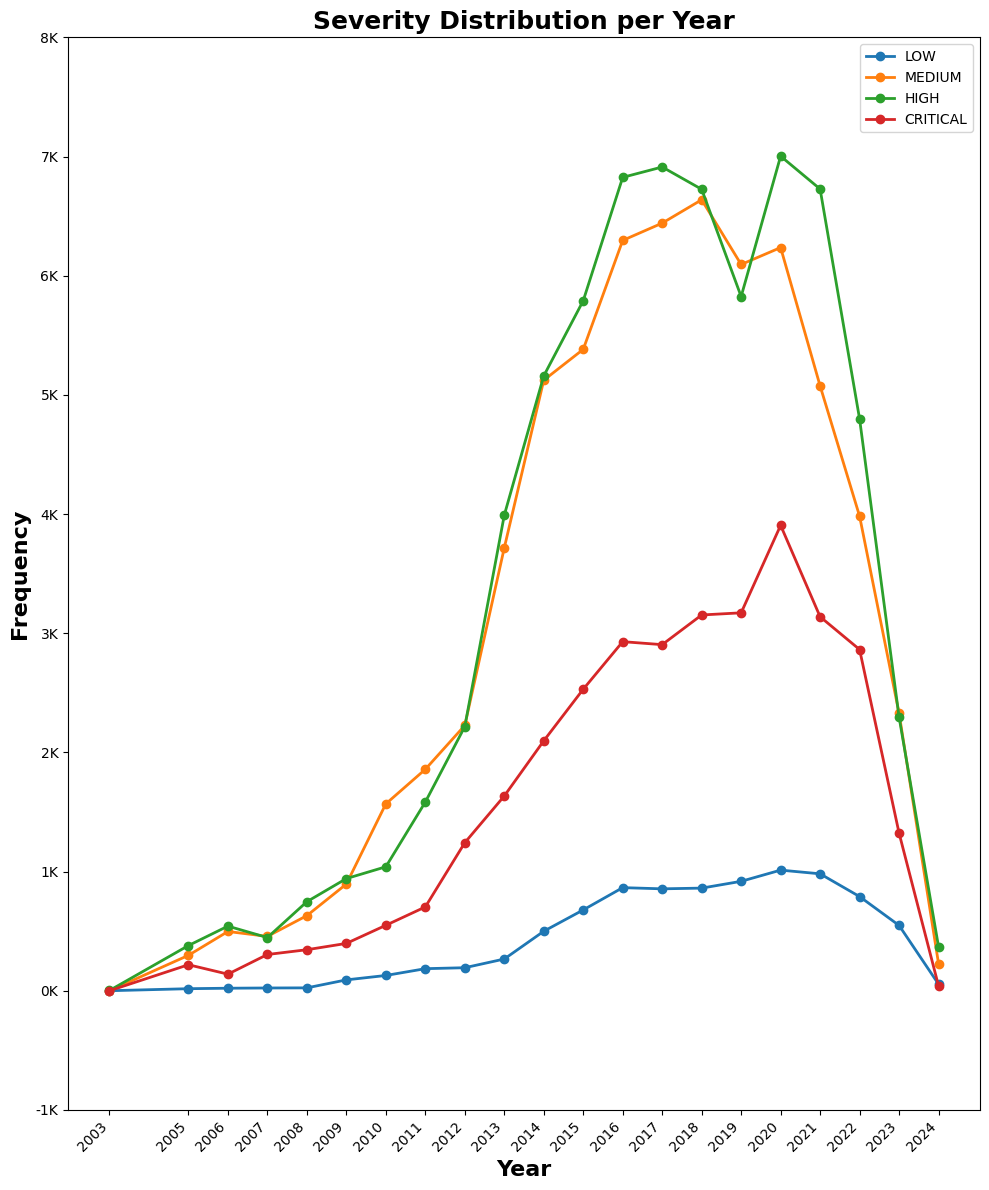

In [ ]:
# Install necessary libraries (if not already installed)
!pip install matplotlib pandas

# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt


# Convert Unix millisecond timestamp to datetime
dataset_onlycve['Timestamp'] = pd.to_datetime(dataset_onlycve['Timestamp'], unit='ms')

# Extract the year from the Timestamp
dataset_onlycve['Year'] = dataset_onlycve['Timestamp'].dt.year

# Group by Year and aggregate severity counts
grouped_df = dataset_onlycve.groupby('Year')[['LOW', 'MEDIUM', 'HIGH', 'CRITICAL']].sum()

# Create the line graph (no background)
fig, ax = plt.subplots(figsize=(10, 12))

# Plot the line graph for each severity level
grouped_df.plot(kind='line', ax=ax, marker='o', linewidth=2, markersize=6)

# Title and labels with larger font size for visibility
ax.set_title('Severity Distribution per Year', fontsize=18, fontweight='bold')
ax.set_xlabel('Year', fontsize=16, fontweight='bold')
ax.set_ylabel('Frequency', fontsize=16, fontweight='bold')

# Set y-axis labels to show counts per thousand (convert from count to thousands)
ax.set_yticks(ax.get_yticks())  # Ensures the ticks remain
ax.set_yticklabels([f'{int(x / 1000)}K' for x in ax.get_yticks()])

# Ensure all years appear on the x-axis
ax.set_xticks(grouped_df.index)  # Set x-ticks to the exact years in the dataset
ax.set_xticklabels(grouped_df.index, rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Remove background color
fig.patch.set_facecolor('none')  # Remove canvas background
ax.set_facecolor('none')  # Remove plot area background

# Display the plot with tight layout for better spacing
plt.tight_layout()
plt.show()


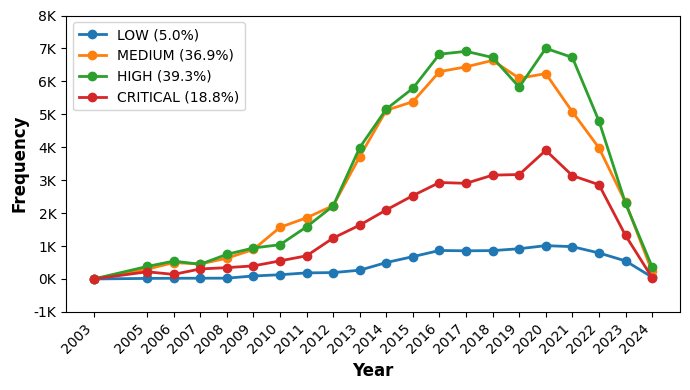

In [ ]:

# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

# Convert Unix millisecond timestamp to datetime
dataset_onlycve['Timestamp'] = pd.to_datetime(dataset_onlycve['Timestamp'], unit='ms')

# Extract the year from the Timestamp
dataset_onlycve['Year'] = dataset_onlycve['Timestamp'].dt.year

# Group by Year and aggregate severity counts
grouped_df = dataset_onlycve.groupby('Year')[['LOW', 'MEDIUM', 'HIGH', 'CRITICAL']].sum()

# Calculate proportions
severity_totals = grouped_df.sum()
proportions = (severity_totals / severity_totals.sum()) * 100

# Create the line graph with adjusted figure size
fig, ax = plt.subplots(figsize=(7, 4))  # Adjusted size for two-column layout

# Plot the line graph for each severity level
grouped_df.plot(kind='line', ax=ax, marker='o', linewidth=2, markersize=6)

#ax.set_title('Severity Distribution per Year', fontsize=14, fontweight='bold')
ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Frequency', fontsize=12, fontweight='bold')

# Set y-axis labels to show counts per thousand (convert from count to thousands)
ax.set_yticks(ax.get_yticks())  # Ensures the ticks remain
ax.set_yticklabels([f'{int(x / 1000)}K' for x in ax.get_yticks()])

# Ensure all years appear on the x-axis
ax.set_xticks(grouped_df.index)  # Set x-ticks to the exact years in the dataset
ax.set_xticklabels(grouped_df.index, rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Add proportions to the legend labels
legend_labels = [f'{label} ({proportions[label]:.1f}%)' for label in grouped_df.columns]
ax.legend(legend_labels, fontsize=10)

# Remove background color
fig.patch.set_facecolor('none')  # Remove canvas background
ax.set_facecolor('none')  # Remove plot area background

# Display the plot with tight layout for better spacing
plt.tight_layout()

# Save the plot with 1200 dpi resolution
plt.savefig('severity_distribution_per_year.png', dpi=2400)

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import numpy as np


# Define bin edges for equal intervals from 0 to 30
first_bins = np.linspace(0, 30, 5)  # This creates bins: 0-7.5, 7.5-15, etc., up to 30

# Combine first_bins and add a single category for values greater than 30
bins = np.concatenate([first_bins[:-1], [30, float('inf')]])  # All values greater than 30 are treated as ">30"

# Define the labels for bins
labels = ['0-7.5', '7.5-15', '15-22.5', '22.5-30', '>30']

# Create the bins and label them
dataset_onlycve['Contribution_Binned'] = pd.cut(dataset_onlycve['Total Contribution'], bins=bins, labels=labels, include_lowest=True)

# Check the result
dataset_onlycve.head()


,ReleaseID,Popularity,Freshness,numberMissedRelease,outdatedTimeInMs,CVE,Artifact,artifact,Timestamp,CVE_count,cve_entries,LOW,MEDIUM,HIGH,CRITICAL,Common Score,Total Contribution,Year,Contribution_Binned
0,ai.djl:api:0.10.0,0,"{'numberMissedRelease': '20', 'outdatedTimeInM...",20,107200281000,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-22]\\"",\\""sever...",api,ai.djl:api,2021-02-23 23:40:21,1,"[(CGA-mcv5-fjr6-wxgg, CRITICAL, {'cwe': '[CWE-...",0,0,0,1,9.5,9.5,2021,7.5-15
1,ai.djl:api:0.11.0,1,"{'numberMissedRelease': '19', 'outdatedTimeInM...",19,101414192000,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-22]\\"",\\""sever...",api,ai.djl:api,2021-05-01 22:55:10,1,"[(CGA-mcv5-fjr6-wxgg, CRITICAL, {'cwe': '[CWE-...",0,0,0,1,9.5,9.5,2021,7.5-15
2,ai.djl:api:0.12.0,0,"{'numberMissedRelease': '18', 'outdatedTimeInM...",18,95605606000,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-22]\\"",\\""sever...",api,ai.djl:api,2021-07-08 04:24:56,1,"[(CGA-mcv5-fjr6-wxgg, CRITICAL, {'cwe': '[CWE-...",0,0,0,1,9.5,9.5,2021,7.5-15
3,ai.djl:api:0.13.0,0,"{'numberMissedRelease': '17', 'outdatedTimeInM...",17,87342127000,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-22]\\"",\\""sever...",api,ai.djl:api,2021-10-11 19:49:35,1,"[(CGA-mcv5-fjr6-wxgg, CRITICAL, {'cwe': '[CWE-...",0,0,0,1,9.5,9.5,2021,7.5-15
4,ai.djl:api:0.14.0,0,"{'numberMissedRelease': '16', 'outdatedTimeInM...",16,84822389000,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-22]\\"",\\""sever...",api,ai.djl:api,2021-11-09 23:45:13,1,"[(CGA-mcv5-fjr6-wxgg, CRITICAL, {'cwe': '[CWE-...",0,0,0,1,9.5,9.5,2021,7.5-15


In [ ]:
dataset_onlycve

,ReleaseID,Popularity,Freshness,numberMissedRelease,outdatedTimeInMs,CVE,Artifact,artifact,Timestamp,CVE_count,...,CRITICAL,Common Score,Total Contribution,Year,Contribution_Binned,outdatedTimeInDays,LOW,MEDIUM,HIGH,CRITICAL
0,ai.djl:api:0.10.0,0,"{'numberMissedRelease': '20', 'outdatedTimeInM...",20,107200281000,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-22]\\"",\\""sever...",api,ai.djl:api,1614123621000000000,1,...,1,9.5,9.5,2021,7.5-15,1240.743993,0,0,0,1
1,ai.djl:api:0.11.0,1,"{'numberMissedRelease': '19', 'outdatedTimeInM...",19,101414192000,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-22]\\"",\\""sever...",api,ai.djl:api,1619909710000000000,1,...,1,9.5,9.5,2021,7.5-15,1173.775370,0,0,0,1
2,ai.djl:api:0.12.0,0,"{'numberMissedRelease': '18', 'outdatedTimeInM...",18,95605606000,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-22]\\"",\\""sever...",api,ai.djl:api,1625718296000000000,1,...,1,9.5,9.5,2021,7.5-15,1106.546366,0,0,0,1
3,ai.djl:api:0.13.0,0,"{'numberMissedRelease': '17', 'outdatedTimeInM...",17,87342127000,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-22]\\"",\\""sever...",api,ai.djl:api,1633981775000000000,1,...,1,9.5,9.5,2021,7.5-15,1010.904248,0,0,0,1
4,ai.djl:api:0.14.0,0,"{'numberMissedRelease': '16', 'outdatedTimeInM...",16,84822389000,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-22]\\"",\\""sever...",api,ai.djl:api,1636501513000000000,1,...,1,9.5,9.5,2021,7.5-15,981.740613,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77388,xerces:xercesImpl:2.7.1,0,"{'numberMissedRelease': '11', 'outdatedTimeInM...",11,510594550000,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-91]\\"",\\""sever...",xercesImpl,xerces:xercesImpl,1132684112000000000,5,...,0,6.5,32.5,2005,>30,5909.659144,0,3,2,0
77389,xerces:xercesImpl:2.8.0,18,"{'numberMissedRelease': '9', 'outdatedTimeInMs...",9,498577537000,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-91]\\"",\\""sever...",xercesImpl,xerces:xercesImpl,1144701125000000000,5,...,0,6.5,32.5,2006,>30,5770.573345,0,3,2,0
77390,xerces:xercesImpl:2.8.1,19,"{'numberMissedRelease': '8', 'outdatedTimeInMs...",8,483056110000,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-91]\\"",\\""sever...",xercesImpl,xerces:xercesImpl,1160222552000000000,5,...,0,6.5,32.5,2006,>30,5590.927199,0,3,2,0
77391,xerces:xercesImpl:2.9.0,0,"{'numberMissedRelease': '7', 'outdatedTimeInMs...",7,420379122000,"{\\""cve\\"":[{\\""cwe\\"":\\""[CWE-91]\\"",\\""sever...",xercesImpl,xerces:xercesImpl,1222899540000000000,5,...,0,6.5,32.5,2008,>30,4865.499097,0,3,2,0


In [ ]:
dataset_onlycve['Contribution_Binned'].value_counts()

,count
Contribution_Binned,
7.5-15,41016
0-7.5,17913
>30,7745
15-22.5,7586
22.5-30,3133


<ipython-input-76-03e51a1d3465>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Contribution_Binned', y='Total Contribution', data=filtered_data,
<ipython-input-76-03e51a1d3465>:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  averages = filtered_data.groupby('Contribution_Binned')['Total Contribution'].mean()
<ipython-input-76-03e51a1d3465>:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=14, fontweight='bold')
<ipython-input-76-03e51a1d3465>:71: UserWarning: This figure includes Axes that are not

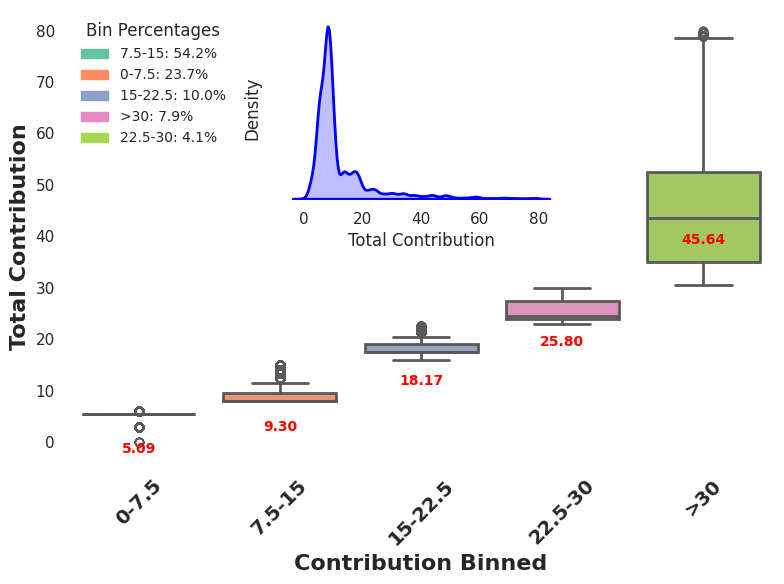

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.patches as mpatches
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Filter the data to include only Total Contribution values up to 80
filtered_data = dataset_onlycve[dataset_onlycve['Total Contribution'] <= 80]

# Calculate the total count of each bin
bin_counts = filtered_data['Contribution_Binned'].value_counts()

# Calculate the percentage for each bin
bin_percentages = (bin_counts / bin_counts.sum()) * 100

# Create the main box plot
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(8, 6))

# Box plot of Total Contribution (up to 80) by Contribution_Binned with a specific color for each box
sns.boxplot(x='Contribution_Binned', y='Total Contribution', data=filtered_data,
            palette="Set2", showmeans=False, linewidth=2, ax=ax)

# Remove grid lines for the box plot
ax.grid(False)

# Remove the plot box by hiding the spines (top, right, bottom)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Calculate the averages (means) for each Contribution_Binned category
averages = filtered_data.groupby('Contribution_Binned')['Total Contribution'].mean()

# Annotate the averages with their values, placing the labels below the boxes (with smaller font size)
for i, avg in enumerate(averages):
    ax.text(averages.index[i], avg - 5, f'{avg:.2f}', color='red', ha='center', va='top',
            fontsize=10, fontweight='bold')  # Smaller font size for the average label

# Create legend with only box colors and percentages (exclude the average line)
patches = [mpatches.Patch(color=sns.color_palette("Set2")[i], label=f'{bin_name}: {bin_percentages[bin_name]:.1f}%')
           for i, bin_name in enumerate(bin_counts.index)]

# Add the percentage-based legend (without the average line)
ax.legend(handles=patches, fontsize=10, title='Bin Percentages', title_fontsize=12, loc='best', frameon=False)

# Add bold labels for the box plot
ax.set_xlabel('Contribution Binned', fontsize=16, fontweight='bold')
ax.set_ylabel('Total Contribution', fontsize=16, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=14, fontweight='bold')

# Create an inset axes for the KDE plot inside the box plot (center top)
inset_ax = inset_axes(ax, width="40%", height="40%", loc="upper center")  # Position the inset at the center top

# Plot KDE inside the inset
sns.kdeplot(data=filtered_data, x='Total Contribution', fill=True, color='blue', linewidth=2, ax=inset_ax)

# Remove grid, box, and title from the inset plot
inset_ax.grid(False)
inset_ax.spines['top'].set_visible(False)
inset_ax.spines['right'].set_visible(False)
inset_ax.spines['bottom'].set_visible(False)
inset_ax.spines['left'].set_visible(False)
inset_ax.set_title('')  # No title

# Remove the y-axis from the inset plot
inset_ax.set_yticklabels([])

# Adjust layout for better spacing
plt.tight_layout()

# Save the combined plot at high resolution (publication quality)
plt.savefig('combined_publication_quality_inset_plot_center_top_no_yaxis.png', dpi=1200)

# Show the combined plot
plt.show()


<ipython-input-57-b1376838efd7>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Contribution_Binned', y='Total Contribution', data=filtered_data,
<ipython-input-57-b1376838efd7>:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  averages = filtered_data.groupby('Contribution_Binned')['Total Contribution'].mean()


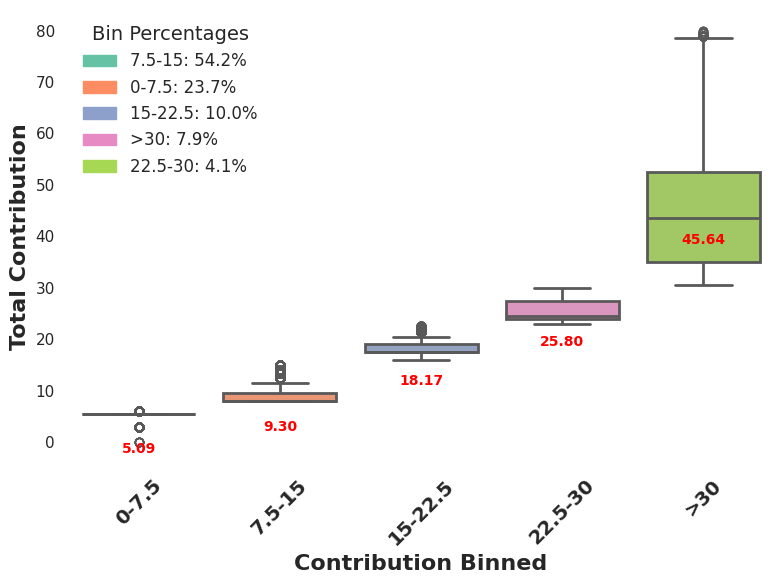

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.patches as mpatches

# Filter the data to include only Total Contribution values up to 80
filtered_data = dataset_onlycve[dataset_onlycve['Total Contribution'] <= 80]

# Calculate the total count of each bin
bin_counts = filtered_data['Contribution_Binned'].value_counts()

# Calculate the percentage for each bin
bin_percentages = (bin_counts / bin_counts.sum()) * 100

# Create the box plot with customized box colors
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Box plot of Total Contribution (up to 80) by Contribution_Binned with a specific color for each box
ax = sns.boxplot(x='Contribution_Binned', y='Total Contribution', data=filtered_data,
                 palette="Set2", showmeans=False, linewidth=2)

# Remove grid lines
ax.grid(False)

# Remove the plot box by hiding the spines (top, right, bottom)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Calculate the averages (means) for each Contribution_Binned category
averages = filtered_data.groupby('Contribution_Binned')['Total Contribution'].mean()

# Annotate the averages with their values, placing the labels below the boxes (with smaller font size)
for i, avg in enumerate(averages):
    plt.text(averages.index[i], avg - 5, f'{avg:.2f}', color='red', ha='center', va='top',
             fontsize=10, fontweight='bold')  # Smaller font size for the average label

# Create legend with only box colors and percentages (exclude the average line)
patches = [mpatches.Patch(color=sns.color_palette("Set2")[i], label=f'{bin_name}: {bin_percentages[bin_name]:.1f}%')
           for i, bin_name in enumerate(bin_counts.index)]

# Add the percentage-based legend (without the average line)
plt.legend(handles=patches, fontsize=12, title='Bin Percentages', title_fontsize=14, loc='best', frameon=False)

# Add bold labels and title
plt.xlabel('Contribution Binned', fontsize=16, fontweight='bold')
plt.ylabel('Total Contribution', fontsize=16, fontweight='bold')

# Customize x-ticks
plt.xticks(rotation=45, fontsize=14, fontweight='bold')

# Show the plot with tight layout for better spacing
plt.tight_layout()

# Save the plot at high resolution (publication quality)
plt.savefig('publication_quality_plot_no_box.png', dpi=1200)

# Show the plot
plt.show()


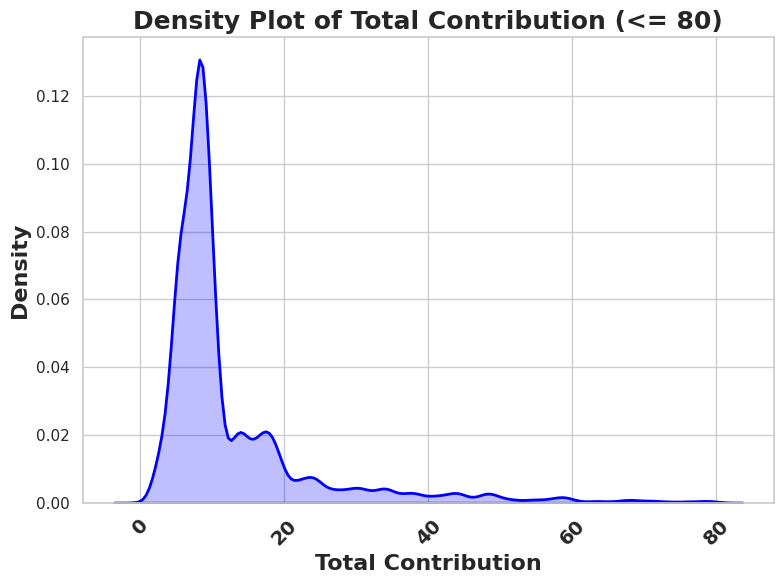

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filter the data to include only Total Contribution values up to 80
filtered_data = dataset_onlycve[dataset_onlycve['Total Contribution'] <= 80]

# Create the density plot (KDE) for Total Contribution
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Plot KDE for Total Contribution
sns.kdeplot(data=filtered_data, x='Total Contribution', fill=True, color='blue', linewidth=2)

# Add bold labels and title
plt.xlabel('Total Contribution', fontsize=16, fontweight='bold')
plt.ylabel('Density', fontsize=16, fontweight='bold')
plt.title('Density Plot of Total Contribution (<= 80)', fontsize=18, fontweight='bold')

# Customize x-ticks
plt.xticks(rotation=45, fontsize=14, fontweight='bold')

# Show the plot with tight layout for better spacing
plt.tight_layout()

# Save the plot at high resolution (publication quality)
plt.savefig('publication_quality_total_contribution_density_plot.png', dpi=1200)

# Show the plot
plt.show()


<ipython-input-24-ae7722a13d29>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Contribution_Binned', y='Total Contribution', data=filtered_data,
<ipython-input-24-ae7722a13d29>:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  averages = filtered_data.groupby('Contribution_Binned')['Total Contribution'].mean()


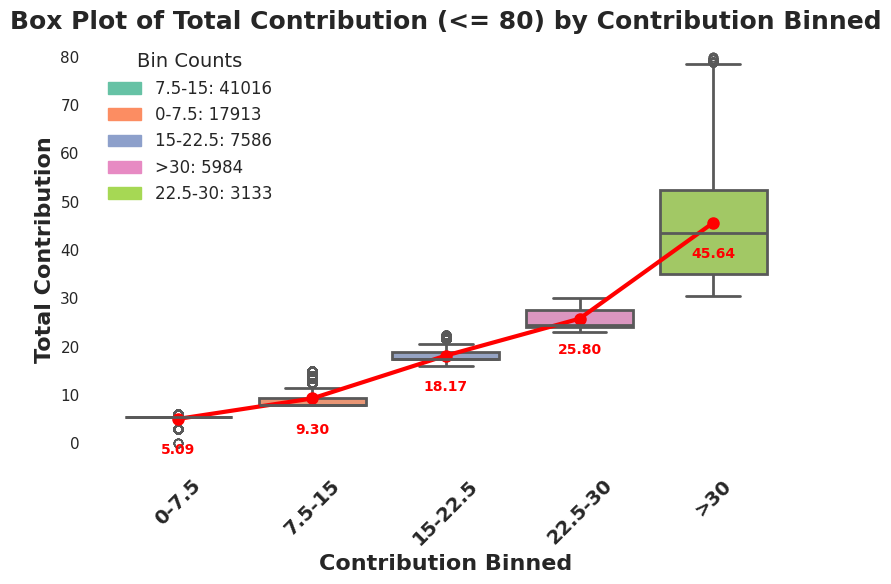

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.patches as mpatches

# Filter the data to include only Total Contribution values up to 80
filtered_data = dataset_onlycve[dataset_onlycve['Total Contribution'] <= 80]

# Calculate the total count of each bin
bin_counts = filtered_data['Contribution_Binned'].value_counts()

# Create the box plot with customized box colors
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Box plot of Total Contribution (up to 80) by Contribution_Binned with a specific color for each box
ax = sns.boxplot(x='Contribution_Binned', y='Total Contribution', data=filtered_data,
                 palette="Set2", showmeans=False, linewidth=2)

# Remove grid lines
ax.grid(False)

# Remove the plot box by hiding the spines (top, right, bottom)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Calculate the averages (means) for each Contribution_Binned category
averages = filtered_data.groupby('Contribution_Binned')['Total Contribution'].mean()

# Plot a line joining the averages with a thicker line
plt.plot(averages.index, averages.values, color='red', marker='o', linestyle='-', linewidth=3, markersize=8)

# Annotate the averages with their values, placing the labels below the boxes (with smaller font size)
for i, avg in enumerate(averages):
    plt.text(averages.index[i], avg - 5, f'{avg:.2f}', color='red', ha='center', va='top',
             fontsize=10, fontweight='bold')  # Smaller font size for the average label

# Create legend with only box colors and counts (exclude the average line)
patches = [mpatches.Patch(color=sns.color_palette("Set2")[i], label=f'{bin_name}: {bin_counts[bin_name]}')
           for i, bin_name in enumerate(bin_counts.index)]

# Add the count-based legend (without the average line)
plt.legend(handles=patches, fontsize=12, title='Bin Counts', title_fontsize=14, loc='best', frameon=False)

# Add bold labels and title
plt.xlabel('Contribution Binned', fontsize=16, fontweight='bold')
plt.ylabel('Total Contribution', fontsize=16, fontweight='bold')
plt.title('Box Plot of Total Contribution (<= 80) by Contribution Binned', fontsize=18, fontweight='bold')

# Customize x-ticks
plt.xticks(rotation=45, fontsize=14, fontweight='bold')

# Show the plot with tight layout for better spacing
plt.tight_layout()

# Save the plot at high resolution (publication quality)
plt.savefig('publication_quality_plot_no_box.png', dpi=1200)

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'outdatedTimeInMs' from milliseconds to days
dataset_onlycve['outdatedTimeInDays'] = dataset_onlycve['outdatedTimeInMs'] / (1000 * 60 * 60 * 24)

# Group by the 'Contribution_Binned' and calculate mean and std for the specified columns
grouped = dataset_onlycve.groupby('Contribution_Binned').agg(
    Popularity_mean=('Popularity', 'mean'),
    Popularity_std=('Popularity', 'std'),
    numberMissedRelease_mean=('numberMissedRelease', 'mean'),
    numberMissedRelease_std=('numberMissedRelease', 'std'),
    outdatedTimeInDays_mean=('outdatedTimeInDays', 'mean'),
    outdatedTimeInDays_std=('outdatedTimeInDays', 'std')
).reset_index()

# Display the result
grouped


<ipython-input-25-dc9fdf80beca>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = dataset_onlycve.groupby('Contribution_Binned').agg(


,Contribution_Binned,Popularity_mean,Popularity_std,numberMissedRelease_mean,numberMissedRelease_std,outdatedTimeInDays_mean,outdatedTimeInDays_std
0,0-7.5,9.718752,677.174954,185.507899,307.617950,1822.929347,1286.233960
1,7.5-15,6.659743,162.601833,280.070387,450.134753,2046.038593,1215.055237
2,15-22.5,7.316636,97.576923,155.547588,153.009631,1972.528736,1282.988767
3,22.5-30,9.090648,119.934263,150.601341,177.182102,2332.699480,1478.889480
4,>30,13.270755,460.449215,141.282892,108.042001,2637.282861,1382.657673


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Convert Unix timestamp to datetime and extract the year
merged_dataset_sorted['release_year'] = pd.to_datetime(
    merged_dataset_sorted['release_timestamp'], unit='ms').dt.year

# Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='release_year', y='Total Contribution', data=merged_dataset_sorted)

# Add titles and labels
plt.title('Distribution of Total Contribution by Release Year', fontsize=16)
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Total Contribution', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Display the plot
plt.show()


OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 51151511-05-07 04:00:00

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the 'Timestamp' column is in numeric format
dataset_onlycve['Timestamp'] = pd.to_numeric(dataset_onlycve['Timestamp'], errors='coerce')

# Convert 'Timestamp' from Unix milliseconds to datetime format
dataset_onlycve['Timestamp'] = pd.to_datetime(dataset_onlycve['Timestamp'], unit='ms')

# Extract Year from 'Timestamp' for grouping
dataset_onlycve['Year'] = dataset_onlycve['Timestamp'].dt.year

# Sort the dataset by 'artifact' and 'Timestamp' in chronological order
dataset_onlycve = dataset_onlycve.sort_values(by=['artifact', 'Timestamp'], ascending=[True, True])

# Calculate the absolute change between consecutive releases (no percentage)
dataset_onlycve['Popularity Change'] = dataset_onlycve.groupby('artifact')['Popularity'].diff()
dataset_onlycve['Total Contribution Change'] = dataset_onlycve.groupby('artifact')['Total Contribution'].diff()
dataset_onlycve['CVE_count Change'] = dataset_onlycve.groupby('artifact')['CVE_count'].diff()

# Calculate the time gap between consecutive releases in days
dataset_onlycve['Time Gap (Days)'] = dataset_onlycve.groupby('artifact')['Timestamp'].diff().dt.days

# Define a function to remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply the outlier removal to each relevant metric column
metrics = ['Popularity Change', 'Total Contribution Change', 'CVE_count Change', 'Time Gap (Days)']
for metric in metrics:
    dataset_onlycve = remove_outliers(dataset_onlycve, metric)

# Set up the plot style and figure size
sns.set(style="whitegrid")

# Create the subplots for each metric change and time gap
fig, axes = plt.subplots(2, 2, figsize=(15, 18))

# Plotting Popularity Change per Year
sns.boxplot(x='Year', y='Popularity Change', data=dataset_onlycve, ax=axes[0, 0])
axes[0, 0].set_title('Popularity Change by Year (Outliers Removed)')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=90)  # Rotate the x-axis labels by 90 degrees

# Plotting Total Contribution Change per Year
sns.boxplot(x='Year', y='Total Contribution Change', data=dataset_onlycve, ax=axes[0, 1])
axes[0, 1].set_title('Total Contribution Change by Year (Outliers Removed)')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=90)  # Rotate the x-axis labels by 90 degrees

# Plotting CVE_count Change per Year
sns.boxplot(x='Year', y='CVE_count Change', data=dataset_onlycve, ax=axes[1, 0])
axes[1, 0].set_title('CVE_count Change by Year (Outliers Removed)')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=90)  # Rotate the x-axis labels by 90 degrees

# Plotting Time Gap per Year
sns.boxplot(x='Year', y='Time Gap (Days)', data=dataset_onlycve, ax=axes[1, 1])
axes[1, 1].set_title('Time Gap Between Releases (Days) by Year (Outliers Removed)')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=90)  # Rotate the x-axis labels by 90 degrees

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Merge the datasets based on the ReleaseID column
merged_dataset = pd.merge(
    big_dataset,
    dataset_onlycve[['ReleaseID', 'CVE_count', 'LOW', 'MEDIUM', 'HIGH', 'CRITICAL',
                     'Common Score', 'Total Contribution', 'Year',
                     'Contribution_Binned', 'outdatedTimeInDays']],
    on='ReleaseID',  # Join on the ReleaseID column
    how='left'  # Use left join
)

# Handle categorical columns
for col in merged_dataset.select_dtypes(include=['category']).columns:
    # Add 0 to the categories if it's not already included
    if 0 not in merged_dataset[col].cat.categories:
        merged_dataset[col] = merged_dataset[col].cat.add_categories([0])

# Fill NaN values with zero
merged_dataset = merged_dataset.fillna(0)

# Display the merged dataset
merged_dataset.head()


,ReleaseID,Popularity,Freshness,numberMissedRelease,outdatedTimeInMs,CVE,Artifact,artifact,Timestamp,CVE_count,LOW,MEDIUM,HIGH,CRITICAL,Common Score,Total Contribution,Year,Contribution_Binned,outdatedTimeInDays
0,HTTPClient:HTTPClient:0.3-3,0,"{'numberMissedRelease': '0', 'outdatedTimeInMs...",0,0,"{\\""cve\\"":[]}",HTTPClient,HTTPClient:HTTPClient,1122887875000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
1,abbot:abbot:0.12.3,0,"{'numberMissedRelease': '2', 'outdatedTimeInMs...",2,320049365000,"{\\""cve\\"":[]}",abbot,abbot:abbot,1122887876000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
2,abbot:abbot:0.13.0,0,"{'numberMissedRelease': '1', 'outdatedTimeInMs...",1,320049364000,"{\\""cve\\"":[]}",abbot,abbot:abbot,1122887877000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
3,abbot:abbot:1.4.0,0,"{'numberMissedRelease': '0', 'outdatedTimeInMs...",0,0,"{\\""cve\\"":[]}",abbot,abbot:abbot,1442937241000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
4,abbot:costello:1.4.0,0,"{'numberMissedRelease': '0', 'outdatedTimeInMs...",0,0,"{\\""cve\\"":[]}",costello,abbot:costello,1443086506000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0


In [ ]:
# Sort the dataset by 'artifact' and then by 'Timestamp' for chronological order within each artifact
merged_dataset_sorted = merged_dataset.sort_values(by=['artifact', 'Timestamp'], ascending=[True, True])



In [ ]:
merged_dataset_sorted

,ReleaseID,Popularity,Freshness,numberMissedRelease,outdatedTimeInMs,CVE,Artifact,artifact,Timestamp,CVE_count,...,CRITICAL,Common Score,Total Contribution,Year,Contribution_Binned,outdatedTimeInDays,Popularity Change,Total Contribution Change,CVE_count Change,Time Gap (Days)
2,abbot:abbot:0.13.0,0,"{'numberMissedRelease': '1', 'outdatedTimeInMs...",1,320049364000,"{\\""cve\\"":[]}",abbot,abbot:abbot,2005-08-01 09:17:57,0.0,...,0.0,0.0,0.0,2005,0,0.0,0.0,0.0,0.0,0.0
7,academy.compose.companion:multi-fab:1.2,0,"{'numberMissedRelease': '1', 'outdatedTimeInMs...",1,554163000,"{\\""cve\\"":[]}",multi-fab,academy.compose.companion:multi-fab,2021-01-07 20:44:22,0.0,...,0.0,0.0,0.0,2021,0,0.0,0.0,0.0,0.0,1.0
8,academy.compose.companion:multi-fab:1.2.3,0,"{'numberMissedRelease': '0', 'outdatedTimeInMs...",0,0,"{\\""cve\\"":[]}",multi-fab,academy.compose.companion:multi-fab,2021-01-14 06:40:25,0.0,...,0.0,0.0,0.0,2021,0,0.0,0.0,0.0,0.0,6.0
70,acegisecurity:acegi-security:0.51,0,"{'numberMissedRelease': '6', 'outdatedTimeInMs...",6,31303316000,"{\\""cve\\"":[]}",acegi-security,acegisecurity:acegi-security,2005-08-02 02:26:34,0.0,...,0.0,0.0,0.0,2005,0,0.0,0.0,0.0,0.0,0.0
71,acegisecurity:acegi-security:0.6.1,0,"{'numberMissedRelease': '6', 'outdatedTimeInMs...",6,31303316000,"{\\""cve\\"":[]}",acegi-security,acegisecurity:acegi-security,2005-08-02 02:26:34,0.0,...,0.0,0.0,0.0,2005,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14459131,zone.wmj:user-agent-util:1.2.6,0,"{'numberMissedRelease': '5', 'outdatedTimeInMs...",5,13540473000,"{\\""cve\\"":[]}",user-agent-util,zone.wmj:user-agent-util,2022-01-10 14:30:32,0.0,...,0.0,0.0,0.0,2022,0,0.0,0.0,0.0,0.0,19.0
14459132,zone.wmj:user-agent-util:1.2.7,0,"{'numberMissedRelease': '4', 'outdatedTimeInMs...",4,11492319000,"{\\""cve\\"":[]}",user-agent-util,zone.wmj:user-agent-util,2022-02-03 07:26:26,0.0,...,0.0,0.0,0.0,2022,0,0.0,0.0,0.0,0.0,23.0
14459133,zone.wmj:user-agent-util:1.2.8,0,"{'numberMissedRelease': '3', 'outdatedTimeInMs...",3,9912078000,"{\\""cve\\"":[]}",user-agent-util,zone.wmj:user-agent-util,2022-02-21 14:23:47,0.0,...,0.0,0.0,0.0,2022,0,0.0,0.0,0.0,0.0,18.0
14459134,zone.wmj:user-agent-util:1.2.9,0,"{'numberMissedRelease': '2', 'outdatedTimeInMs...",2,8373804000,"{\\""cve\\"":[]}",user-agent-util,zone.wmj:user-agent-util,2022-03-11 09:41:41,0.0,...,0.0,0.0,0.0,2022,0,0.0,0.0,0.0,0.0,17.0


In [ ]:
unique_count = merged_dataset_sorted['artifact'].nunique()


<ipython-input-29-5367ae7e3709>:104: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, x=class_column, y=feature_column, ci="sd", palette="muted")
<ipython-input-29-5367ae7e3709>:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=class_column, y=feature_column, ci="sd", palette="muted")


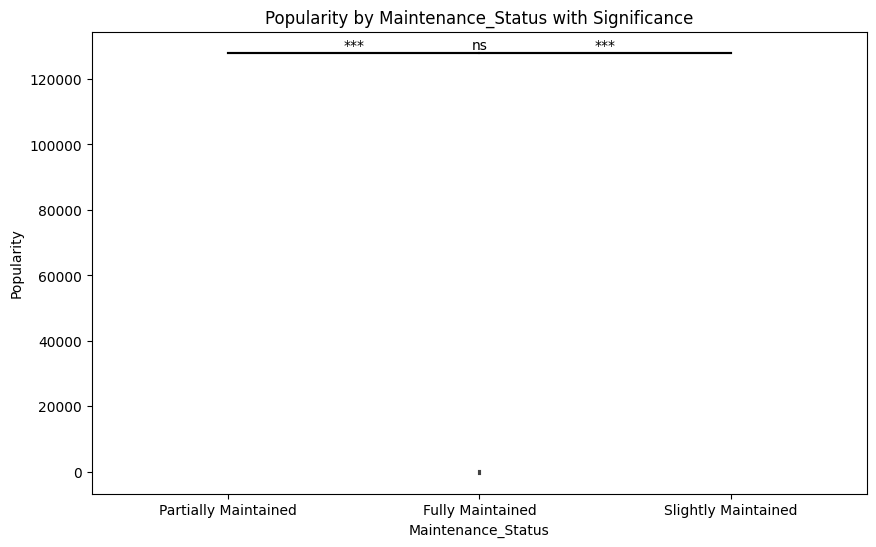

<ipython-input-29-5367ae7e3709>:104: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, x=class_column, y=feature_column, ci="sd", palette="muted")
<ipython-input-29-5367ae7e3709>:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=class_column, y=feature_column, ci="sd", palette="muted")


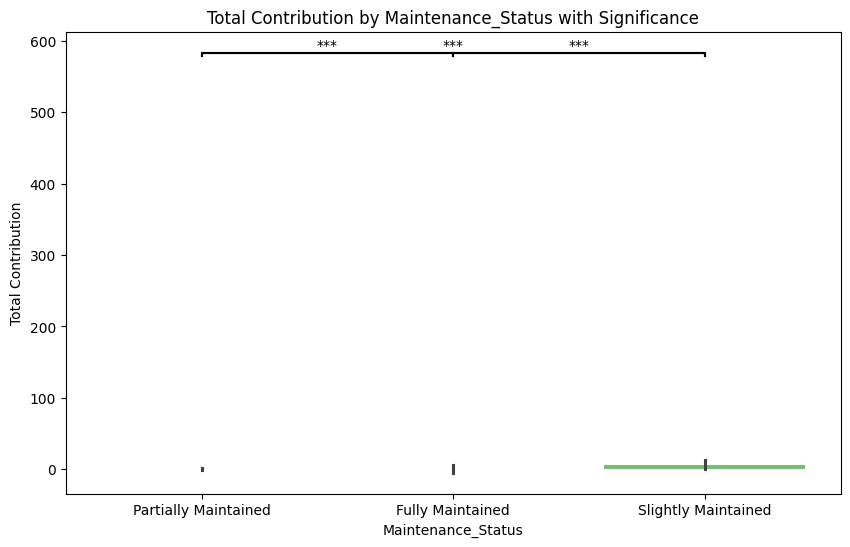

In [ ]:
import pandas as pd
from concurrent.futures import ProcessPoolExecutor
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multitest import multipletests

# Convert Timestamp to datetime format
merged_dataset_sorted['Timestamp'] = pd.to_datetime(merged_dataset_sorted['Timestamp'])

# Updated criteria check functions
def check_popularity_increase(group, min_increases=2):

    increase_count = sum(group['Popularity'].iloc[i] < group['Popularity'].iloc[i+1]
                         for i in range(len(group) - 1))
    return increase_count >= min_increases

def check_total_contribution_decrease(group, min_decreases=2, threshold=8):

    # Count the number of decreases in 'Total Contribution'
    decrease_count = sum(group['Total Contribution'].iloc[i] > group['Total Contribution'].iloc[i+1]
                         for i in range(len(group) - 1))

    # Check if all contributions remain below the threshold
    below_threshold = all(group['Total Contribution'] < threshold)

    # Consider maintained if either condition is met
    return decrease_count >= min_decreases or below_threshold

def check_release_frequency(group):
    """Check if at least one release is within the last 6 months."""
    time_span = (group['Timestamp'].max() - group['Timestamp'].min()).days
    return time_span <= 183  # 6 months = 183 days

# Function to classify maintenance status
def classify_maintenance(artifact_group):
    """Classify maintenance status based on criteria."""
    is_popular = check_popularity_increase(artifact_group)
    is_decreasing_contribution = check_total_contribution_decrease(artifact_group)
    is_fresh = check_release_frequency(artifact_group)

    criteria_count = sum([is_popular, is_decreasing_contribution, is_fresh])

    if criteria_count == 3:
        return 'Fully Maintained'
    elif criteria_count == 2:
        return 'Partially Maintained'
    elif criteria_count == 1:
        return 'Slightly Maintained'
    else:
        return 'Not Maintained'

# Process each artifact group
def process_artifact_group(artifact_group):
    artifact = artifact_group['artifact'].iloc[0]  # Get artifact name
    maintenance_status = classify_maintenance(artifact_group)
    return (artifact, maintenance_status)

# Parallel processing with ProcessPoolExecutor
def parallel_process(df):
    groups = [group for _, group in df.groupby('artifact')]
    with ProcessPoolExecutor() as executor:
        results = list(executor.map(process_artifact_group, groups))
    return pd.DataFrame(results, columns=['artifact', 'Maintenance_Status'])

# Perform pairwise t-tests
def perform_t_tests(df, feature_column, class_column='Maintenance_Status'):
    classes = df[class_column].unique()
    results = []

    for i, class1 in enumerate(classes):
        for class2 in classes[i+1:]:
            group1 = df[df[class_column] == class1][feature_column]
            group2 = df[df[class_column] == class2][feature_column]

            t_stat, p_value = ttest_ind(group1, group2, equal_var=False)
            results.append({
                'Feature': feature_column,
                'Class1': class1,
                'Class2': class2,
                'T-Statistic': t_stat,
                'P-Value': p_value
            })

    return pd.DataFrame(results)

# Visualize the results with a bar plot
def plot_significance(df, feature_column, class_column='Maintenance_Status'):
    # Perform pairwise t-tests
    test_results = perform_t_tests(df, feature_column, class_column)

    # Adjust p-values for multiple comparisons
    test_results['Adjusted P-Value'] = multipletests(test_results['P-Value'], method='bonferroni')[1]
    test_results['Significance'] = test_results['Adjusted P-Value'].apply(lambda p: '***' if p < 0.001 else
                                                                         '**' if p < 0.01 else
                                                                         '*' if p < 0.05 else 'ns')

    # Create a bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df, x=class_column, y=feature_column, ci="sd", palette="muted")

    # Add significance annotations
    for i, row in test_results.iterrows():
        class1_idx = df[class_column].unique().tolist().index(row['Class1'])
        class2_idx = df[class_column].unique().tolist().index(row['Class2'])
        x1, x2 = class1_idx, class2_idx
        y, h = df[feature_column].max() + 5, 5
        plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], color='black')
        plt.text((x1+x2)*.5, y+h, row['Significance'], ha='center', va='bottom', color='black')

    plt.title(f"{feature_column} by {class_column} with Significance")
    plt.xlabel(class_column)
    plt.ylabel(feature_column)
    plt.show()

# Run the classification and visualization
labeled_artifacts_df = parallel_process(merged_dataset_sorted)
merged_data = labeled_artifacts_df.merge(merged_dataset_sorted, on='artifact')

# Visualize for 'Popularity' feature
plot_significance(merged_data, feature_column='Popularity')

# Visualize for 'Total Contribution' feature
plot_significance(merged_data, feature_column='Total Contribution')


In [ ]:
labeled_artifacts_df

,artifact,Maintenance_Status
0,HTTPClient:HTTPClient,Partially Maintained
1,abbot:abbot,Partially Maintained
2,abbot:costello,Partially Maintained
3,academy.alex:custommatcher,Partially Maintained
4,academy.compose.companion:multi-fab,Partially Maintained
...,...,...
634998,zone.src.sheaf:sheaf-parent,Partially Maintained
634999,zone.src.sheaf:web-sheaf,Partially Maintained
635000,zone.stefan.dev:geocode,Partially Maintained
635001,zone.wmj:user-agent-util,Partially Maintained


In [ ]:
labeled_artifacts_df['Maintenance_Status'].value_counts()

,count
Maintenance_Status,
Partially Maintained,601586
Fully Maintained,33101
Slightly Maintained,316


Significant differences detected (p-value = 0.000)


/usr/local/lib/python3.10/dist-packages/statsmodels/sandbox/stats/multicomp.py:1300: RuntimeWarning: divide by zero encountered in divide
  st_range = np.abs(meandiffs) / std_pairs #studentized range statistic


            Multiple Comparison of Means - Tukey HSD, FWER=0.05            
       group1               group2        meandiff p-adj lower upper reject
---------------------------------------------------------------------------
    Fully Maintained Partially Maintained      1.0   0.0   1.0   1.0   True
    Fully Maintained  Slightly Maintained      2.0   0.0   2.0   2.0   True
Partially Maintained  Slightly Maintained      1.0   0.0   1.0   1.0   True
---------------------------------------------------------------------------


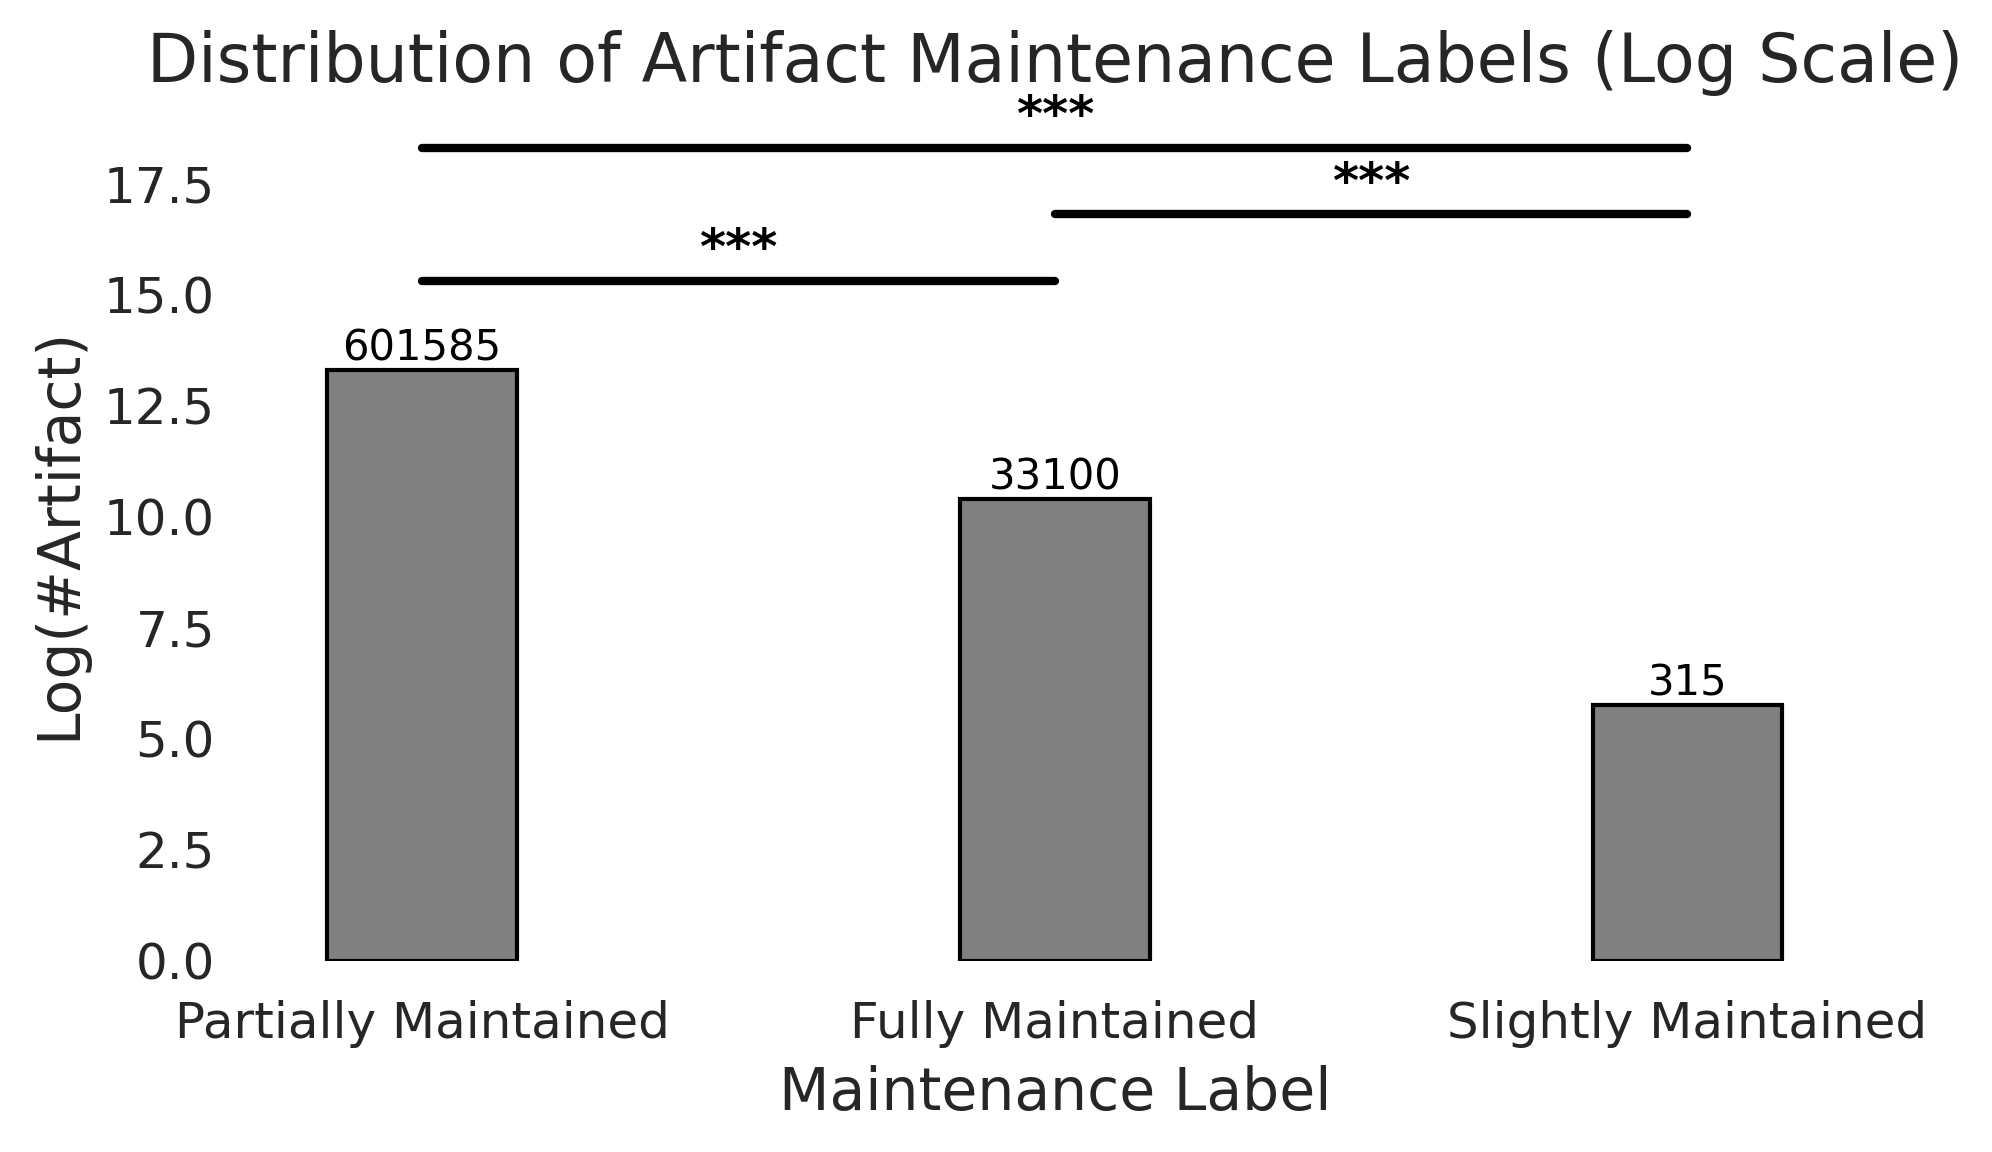

P-value from the Kruskal-Wallis test: 0.000


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Assuming 'labeled_artifacts_df' is the DataFrame containing the data
data = labeled_artifacts_df['Maintenance_Status']

# Encode the 'Maintenance_Status' as numeric (if it's not already)
data_encoded = data.astype('category').cat.codes

# Create a DataFrame with counts of 'Maintenance_Status' for plotting
label_counts = data.value_counts().reset_index()
label_counts.columns = ['Maintained_Label', 'Count']
label_counts['Log_Count'] = np.log1p(label_counts['Count'])

# Perform a statistical test (e.g., Kruskal-Wallis test)
unique_labels = label_counts['Maintained_Label'].unique()
group_data = [data[data == label] for label in unique_labels]

# Kruskal-Wallis test (non-parametric)
stat, p_value = stats.kruskal(*group_data)

# Conduct post-hoc pairwise comparisons using Tukey's HSD test
if p_value < 0.05:
    print(f"Significant differences detected (p-value = {p_value:.3f})")
    # Perform pairwise comparisons
    post_hoc = pairwise_tukeyhsd(endog=data_encoded, groups=data, alpha=0.05)
    print(post_hoc.summary())

# Create a high-quality plot for two-column format
plt.figure(figsize=(6.7, 4), dpi=300)  # Adjusted size for two-column format

# Use a narrower bar width for closer bars
bar_width = 0.3  # Narrower bars for tighter spacing
bar_positions = np.arange(len(label_counts))  # Use default positions for bars, no multiplier

# Use gray color scale for bars
bars = plt.bar(bar_positions, label_counts['Log_Count'], color='gray', edgecolor='black', width=bar_width)

# Adding data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(np.expm1(yval)),
             ha='center', va='bottom', fontsize=10, color='black')

# Annotating the significance with stars (if significant)
if p_value < 0.05:
    # Define significance based on p-values
    def significance_stars(p):
        if p < 0.001:
            return "***"
        elif p < 0.01:
            return "**"
        elif p < 0.05:
            return "*"
        else:
            return ""

    # Get the max y-value for positioning the significance lines
    y_max = max(label_counts['Log_Count'])

    # Custom groups: pairwise comparisons (1-2, 1-3, 2-3)
    pairs = [(0, 1), (0, 2), (1, 2)]  # These are the indices of the group pairs to compare

    # Sort the pairs based on the absolute difference in y-values, from highest to lowest
    pairs = sorted(pairs, key=lambda x: abs(label_counts['Log_Count'][x[0]] - label_counts['Log_Count'][x[1]]), reverse=True)

    # Increase the line_offset to ensure more separation between significance lines
    line_offset = 0.7  # Larger offset for more separation
    line_offset_top = y_max + 5  # Increased offset for the first line at the top (higher)

    # Place the longest line at the top, followed by others with more spacing
    for i, (group1, group2) in enumerate(pairs):
        if post_hoc.pvalues[i] < 0.05:
            # Set the vertical position based on the longest line first
            if i == 0:  # First iteration for longest line
                y_pos = line_offset_top
            else:  # For others, place lower than the previous one
                y_pos = line_offset_top - (i * 1.5)  # Increase the gap more for subsequent lines

            # Plot the significance line
            plt.plot([bar_positions[group1], bar_positions[group2]], [y_pos, y_pos], color='black', lw=2)
            # Add a gap above the line for stars
            plt.text((bar_positions[group1] + bar_positions[group2]) / 2, y_pos + 0.15,
                     significance_stars(post_hoc.pvalues[i]), ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Customize axes
plt.xlabel('Maintenance Label', fontsize=14)
plt.ylabel('Log(#Artifact)', fontsize=14)
plt.title('Distribution of Artifact Maintenance Labels (Log Scale)', fontsize=16)
plt.xticks(bar_positions, label_counts['Maintained_Label'], fontsize=12)  # Ensure x-ticks match the bars
plt.yticks(fontsize=12)

# Remove grid and box
plt.grid(False)  # Disable grid
plt.gca().spines['top'].set_visible(False)  # Remove top spine
plt.gca().spines['right'].set_visible(False)  # Remove right spine
plt.gca().spines['left'].set_visible(False)  # Remove left spine
plt.gca().spines['bottom'].set_visible(False)  # Optionally remove bottom spine

# Apply tight layout to ensure everything fits
plt.tight_layout()

# Save the figure in high quality
plt.savefig('artifact_maintenance_distribution_black_white_2col_comparison_stars.png', format='png', dpi=1200)  # Save as PNG
plt.show()

# Print the p-value for the Kruskal-Wallis test
print(f"P-value from the Kruskal-Wallis test: {p_value:.3f}")


In [ ]:
import pandas as pd
import numpy as np

# Define bin edges for equal intervals from 0 to 30
first_bins = np.linspace(0, 30, 5)

# Combine first_bins and add a single category for values greater than 30
bins = np.concatenate([first_bins[:-1], [30, float('inf')]])

# Define the labels for bins
labels = ['0-7.5', '7.5-15', '15-22.5', '22.5-30', '>30']

# Create the bins and label them
merged_dataset_sorted['Contribution_Binned'] = pd.cut(merged_dataset_sorted['Total Contribution'], bins=bins, labels=labels, include_lowest=True)

# Check the result
merged_dataset_sorted.head()


,ReleaseID,Popularity,Freshness,numberMissedRelease,outdatedTimeInMs,CVE,Artifact,artifact,Timestamp,CVE_count,LOW,MEDIUM,HIGH,CRITICAL,Common Score,Total Contribution,Year,Contribution_Binned,outdatedTimeInDays
0,HTTPClient:HTTPClient:0.3-3,0,"{'numberMissedRelease': '0', 'outdatedTimeInMs...",0,0,"{\\""cve\\"":[]}",HTTPClient,HTTPClient:HTTPClient,1970-01-01 00:18:42.887875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0-7.5,0.0
1,abbot:abbot:0.12.3,0,"{'numberMissedRelease': '2', 'outdatedTimeInMs...",2,320049365000,"{\\""cve\\"":[]}",abbot,abbot:abbot,1970-01-01 00:18:42.887876,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0-7.5,0.0
2,abbot:abbot:0.13.0,0,"{'numberMissedRelease': '1', 'outdatedTimeInMs...",1,320049364000,"{\\""cve\\"":[]}",abbot,abbot:abbot,1970-01-01 00:18:42.887877,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0-7.5,0.0
3,abbot:abbot:1.4.0,0,"{'numberMissedRelease': '0', 'outdatedTimeInMs...",0,0,"{\\""cve\\"":[]}",abbot,abbot:abbot,1970-01-01 00:24:02.937241,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0-7.5,0.0
4,abbot:costello:1.4.0,0,"{'numberMissedRelease': '0', 'outdatedTimeInMs...",0,0,"{\\""cve\\"":[]}",costello,abbot:costello,1970-01-01 00:24:03.086506,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0-7.5,0.0


In [ ]:
merged_dataset_sorted

,ReleaseID,Popularity,Freshness,numberMissedRelease,outdatedTimeInMs,CVE,Artifact,artifact,Timestamp,CVE_count,...,CRITICAL,Common Score,Total Contribution,Year,Contribution_Binned,outdatedTimeInDays,Popularity Change,Total Contribution Change,CVE_count Change,Time Gap (Days)
2,abbot:abbot:0.13.0,0,"{'numberMissedRelease': '1', 'outdatedTimeInMs...",1,320049364000,"{\\""cve\\"":[]}",abbot,abbot:abbot,2005-08-01 09:17:57,0.0,...,0.0,0.0,0.0,2005,0,0.0,0.0,0.0,0.0,0.0
7,academy.compose.companion:multi-fab:1.2,0,"{'numberMissedRelease': '1', 'outdatedTimeInMs...",1,554163000,"{\\""cve\\"":[]}",multi-fab,academy.compose.companion:multi-fab,2021-01-07 20:44:22,0.0,...,0.0,0.0,0.0,2021,0,0.0,0.0,0.0,0.0,1.0
8,academy.compose.companion:multi-fab:1.2.3,0,"{'numberMissedRelease': '0', 'outdatedTimeInMs...",0,0,"{\\""cve\\"":[]}",multi-fab,academy.compose.companion:multi-fab,2021-01-14 06:40:25,0.0,...,0.0,0.0,0.0,2021,0,0.0,0.0,0.0,0.0,6.0
70,acegisecurity:acegi-security:0.51,0,"{'numberMissedRelease': '6', 'outdatedTimeInMs...",6,31303316000,"{\\""cve\\"":[]}",acegi-security,acegisecurity:acegi-security,2005-08-02 02:26:34,0.0,...,0.0,0.0,0.0,2005,0,0.0,0.0,0.0,0.0,0.0
71,acegisecurity:acegi-security:0.6.1,0,"{'numberMissedRelease': '6', 'outdatedTimeInMs...",6,31303316000,"{\\""cve\\"":[]}",acegi-security,acegisecurity:acegi-security,2005-08-02 02:26:34,0.0,...,0.0,0.0,0.0,2005,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14459131,zone.wmj:user-agent-util:1.2.6,0,"{'numberMissedRelease': '5', 'outdatedTimeInMs...",5,13540473000,"{\\""cve\\"":[]}",user-agent-util,zone.wmj:user-agent-util,2022-01-10 14:30:32,0.0,...,0.0,0.0,0.0,2022,0,0.0,0.0,0.0,0.0,19.0
14459132,zone.wmj:user-agent-util:1.2.7,0,"{'numberMissedRelease': '4', 'outdatedTimeInMs...",4,11492319000,"{\\""cve\\"":[]}",user-agent-util,zone.wmj:user-agent-util,2022-02-03 07:26:26,0.0,...,0.0,0.0,0.0,2022,0,0.0,0.0,0.0,0.0,23.0
14459133,zone.wmj:user-agent-util:1.2.8,0,"{'numberMissedRelease': '3', 'outdatedTimeInMs...",3,9912078000,"{\\""cve\\"":[]}",user-agent-util,zone.wmj:user-agent-util,2022-02-21 14:23:47,0.0,...,0.0,0.0,0.0,2022,0,0.0,0.0,0.0,0.0,18.0
14459134,zone.wmj:user-agent-util:1.2.9,0,"{'numberMissedRelease': '2', 'outdatedTimeInMs...",2,8373804000,"{\\""cve\\"":[]}",user-agent-util,zone.wmj:user-agent-util,2022-03-11 09:41:41,0.0,...,0.0,0.0,0.0,2022,0,0.0,0.0,0.0,0.0,17.0


In [ ]:
merged_dataset_sorted['Contribution_Binned'].value_counts()

,count
Contribution_Binned,
0,11851488
7.5-15,30632
0-7.5,12769
15-22.5,5231
>30,4061
22.5-30,1805


In [ ]:
merged_dataset_sorted

,ReleaseID,Popularity,Freshness,numberMissedRelease,outdatedTimeInMs,CVE,Artifact,artifact,Timestamp,CVE_count,...,CRITICAL,Common Score,Total Contribution,Year,Contribution_Binned,outdatedTimeInDays,Popularity Change,Total Contribution Change,CVE_count Change,Time Gap (Days)
2,abbot:abbot:0.13.0,0,"{'numberMissedRelease': '1', 'outdatedTimeInMs...",1,320049364000,"{\\""cve\\"":[]}",abbot,abbot:abbot,2005-08-01 09:17:57,0.0,...,0.0,0.0,0.0,2005,0,0.0,0.0,0.0,0.0,0.0
7,academy.compose.companion:multi-fab:1.2,0,"{'numberMissedRelease': '1', 'outdatedTimeInMs...",1,554163000,"{\\""cve\\"":[]}",multi-fab,academy.compose.companion:multi-fab,2021-01-07 20:44:22,0.0,...,0.0,0.0,0.0,2021,0,0.0,0.0,0.0,0.0,1.0
8,academy.compose.companion:multi-fab:1.2.3,0,"{'numberMissedRelease': '0', 'outdatedTimeInMs...",0,0,"{\\""cve\\"":[]}",multi-fab,academy.compose.companion:multi-fab,2021-01-14 06:40:25,0.0,...,0.0,0.0,0.0,2021,0,0.0,0.0,0.0,0.0,6.0
70,acegisecurity:acegi-security:0.51,0,"{'numberMissedRelease': '6', 'outdatedTimeInMs...",6,31303316000,"{\\""cve\\"":[]}",acegi-security,acegisecurity:acegi-security,2005-08-02 02:26:34,0.0,...,0.0,0.0,0.0,2005,0,0.0,0.0,0.0,0.0,0.0
71,acegisecurity:acegi-security:0.6.1,0,"{'numberMissedRelease': '6', 'outdatedTimeInMs...",6,31303316000,"{\\""cve\\"":[]}",acegi-security,acegisecurity:acegi-security,2005-08-02 02:26:34,0.0,...,0.0,0.0,0.0,2005,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14459131,zone.wmj:user-agent-util:1.2.6,0,"{'numberMissedRelease': '5', 'outdatedTimeInMs...",5,13540473000,"{\\""cve\\"":[]}",user-agent-util,zone.wmj:user-agent-util,2022-01-10 14:30:32,0.0,...,0.0,0.0,0.0,2022,0,0.0,0.0,0.0,0.0,19.0
14459132,zone.wmj:user-agent-util:1.2.7,0,"{'numberMissedRelease': '4', 'outdatedTimeInMs...",4,11492319000,"{\\""cve\\"":[]}",user-agent-util,zone.wmj:user-agent-util,2022-02-03 07:26:26,0.0,...,0.0,0.0,0.0,2022,0,0.0,0.0,0.0,0.0,23.0
14459133,zone.wmj:user-agent-util:1.2.8,0,"{'numberMissedRelease': '3', 'outdatedTimeInMs...",3,9912078000,"{\\""cve\\"":[]}",user-agent-util,zone.wmj:user-agent-util,2022-02-21 14:23:47,0.0,...,0.0,0.0,0.0,2022,0,0.0,0.0,0.0,0.0,18.0
14459134,zone.wmj:user-agent-util:1.2.9,0,"{'numberMissedRelease': '2', 'outdatedTimeInMs...",2,8373804000,"{\\""cve\\"":[]}",user-agent-util,zone.wmj:user-agent-util,2022-03-11 09:41:41,0.0,...,0.0,0.0,0.0,2022,0,0.0,0.0,0.0,0.0,17.0


In [ ]:
import pandas as pd


# Merge the two DataFrames on the 'artifact' column
merged_dataset_with_status = pd.merge(merged_dataset_sorted, labeled_artifacts_df[['artifact', 'Maintenance_Status']],
                                      on='artifact', how='left')


merged_dataset_with_status.head()




,ReleaseID,Popularity,Freshness,numberMissedRelease,outdatedTimeInMs,CVE,Artifact,artifact,Timestamp,CVE_count,...,Common Score,Total Contribution,Year,Contribution_Binned,outdatedTimeInDays,Popularity Change,Total Contribution Change,CVE_count Change,Time Gap (Days),Maintenance_Status
0,abbot:abbot:0.13.0,0,"{'numberMissedRelease': '1', 'outdatedTimeInMs...",1,320049364000,"{\\""cve\\"":[]}",abbot,abbot:abbot,2005-08-01 09:17:57,0.0,...,0.0,0.0,2005,0,0.0,0.0,0.0,0.0,0.0,Partially Maintained
1,academy.compose.companion:multi-fab:1.2,0,"{'numberMissedRelease': '1', 'outdatedTimeInMs...",1,554163000,"{\\""cve\\"":[]}",multi-fab,academy.compose.companion:multi-fab,2021-01-07 20:44:22,0.0,...,0.0,0.0,2021,0,0.0,0.0,0.0,0.0,1.0,Partially Maintained
2,academy.compose.companion:multi-fab:1.2.3,0,"{'numberMissedRelease': '0', 'outdatedTimeInMs...",0,0,"{\\""cve\\"":[]}",multi-fab,academy.compose.companion:multi-fab,2021-01-14 06:40:25,0.0,...,0.0,0.0,2021,0,0.0,0.0,0.0,0.0,6.0,Partially Maintained
3,acegisecurity:acegi-security:0.51,0,"{'numberMissedRelease': '6', 'outdatedTimeInMs...",6,31303316000,"{\\""cve\\"":[]}",acegi-security,acegisecurity:acegi-security,2005-08-02 02:26:34,0.0,...,0.0,0.0,2005,0,0.0,0.0,0.0,0.0,0.0,Partially Maintained
4,acegisecurity:acegi-security:0.6.1,0,"{'numberMissedRelease': '6', 'outdatedTimeInMs...",6,31303316000,"{\\""cve\\"":[]}",acegi-security,acegisecurity:acegi-security,2005-08-02 02:26:34,0.0,...,0.0,0.0,2005,0,0.0,0.0,0.0,0.0,0.0,Partially Maintained


In [ ]:
merged_dataset_with_status['Total Contribution'].value_counts()

,count
Total Contribution,
0.0,11851488
8.0,16023
5.5,10407
9.5,9116
13.5,2243
...,...
123.5,1
301.5,1
178.5,1


<ipython-input-164-a2b0c1451129>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=filtered_popularity, x='Maintenance_Status', y='Popularity', palette="Set2")


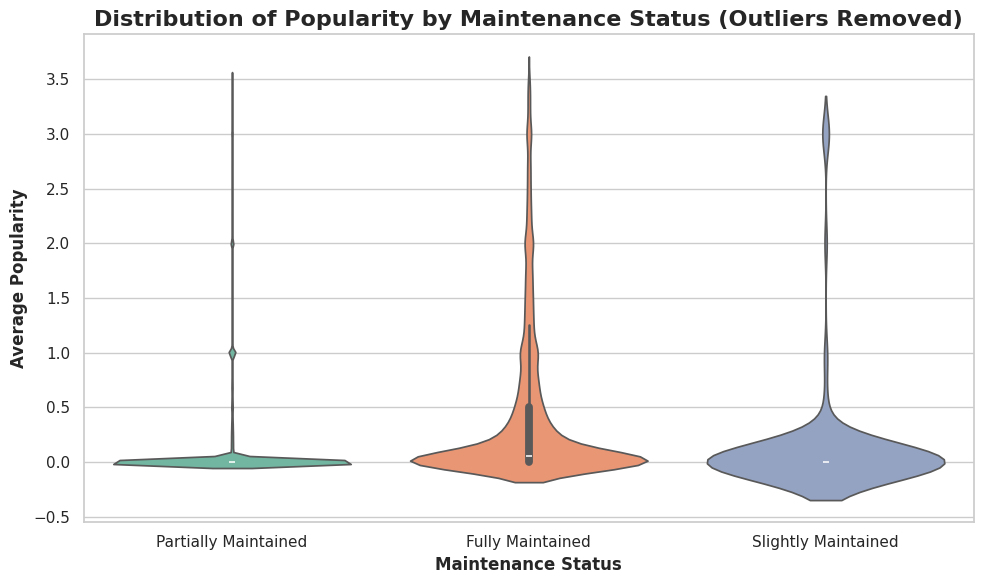

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Step 1: Calculate the average popularity for each artifact across releases
average_popularity = merged_dataset_with_status.groupby(['artifact', 'Maintenance_Status'])['Popularity'].mean().reset_index()

# Step 2: Remove outliers manually (optional, if you want to remove extreme values)
lower_threshold = average_popularity['Popularity'].quantile(0.01)  # 1st percentile
upper_threshold = average_popularity['Popularity'].quantile(0.99)  # 99th percentile

filtered_popularity = average_popularity[(average_popularity['Popularity'] >= lower_threshold) &
                                          (average_popularity['Popularity'] <= upper_threshold)]

# Step 3: Create a violin plot to show the distribution of popularity for each Maintenance_Status
plt.figure(figsize=(10, 6))

# Violin plot for popularity distribution by Maintenance_Status (avoiding outliers)
sns.violinplot(data=filtered_popularity, x='Maintenance_Status', y='Popularity', palette="Set2")

# Set the title and labels
plt.title('Distribution of Popularity by Maintenance Status (Outliers Removed)', fontsize=16, fontweight='bold')
plt.xlabel('Maintenance Status', fontsize=12, fontweight='bold')
plt.ylabel('Average Popularity', fontsize=12, fontweight='bold')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


<ipython-input-169-625ef004ca62>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=filtered_contribution, x='Maintenance_Status', y='Total Contribution', palette="Set2")


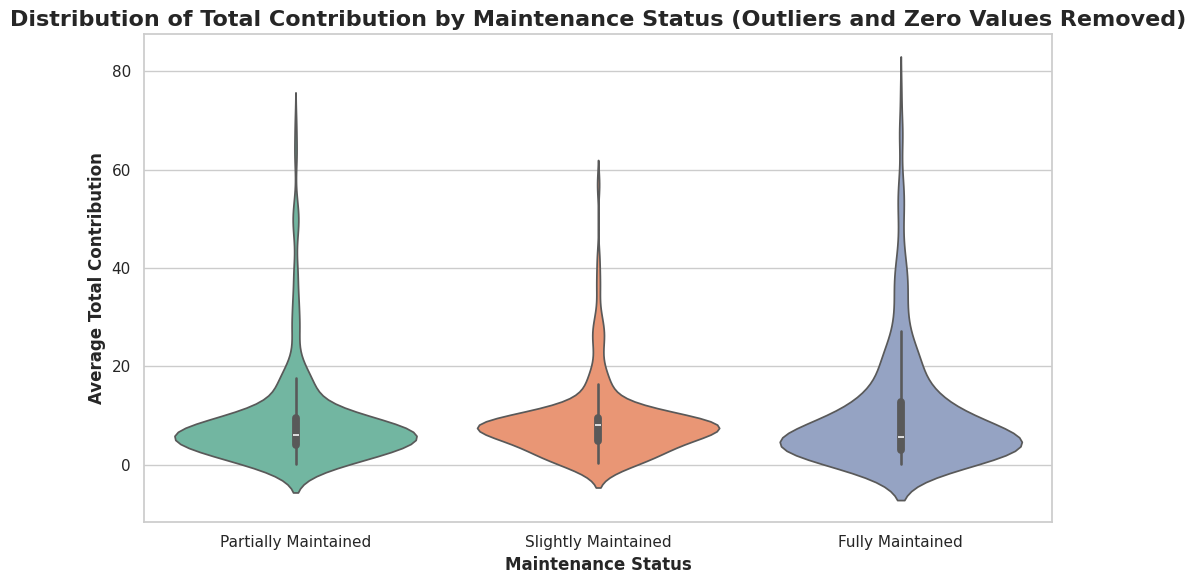

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Calculate the average Total Contribution for each artifact across releases
average_contribution = merged_dataset_with_status.groupby(['artifact', 'Maintenance_Status'])['Total Contribution'].mean().reset_index()

# Step 2: Remove rows where Total Contribution is zero
filtered_contribution = average_contribution[average_contribution['Total Contribution'] > 0]

# Define a threshold to filter out outliers (e.g., Total Contribution values outside the 1st and 99th percentiles)
lower_threshold = filtered_contribution['Total Contribution'].quantile(0.01)  # 1st percentile
upper_threshold = filtered_contribution['Total Contribution'].quantile(0.99)  # 99th percentile

# Filter out data points outside the 1st and 99th percentiles
filtered_contribution = filtered_contribution[(filtered_contribution['Total Contribution'] >= lower_threshold) &
                                              (filtered_contribution['Total Contribution'] <= upper_threshold)]

# Step 4: Create a violin plot to show the distribution of Total Contribution for each Maintenance_Status
plt.figure(figsize=(10, 6))

# Violin plot for Total Contribution distribution by Maintenance_Status (avoiding outliers and zeros)
sns.violinplot(data=filtered_contribution, x='Maintenance_Status', y='Total Contribution', palette="Set2")

# Set the title and labels
plt.title('Distribution of Total Contribution by Maintenance Status (Outliers and Zero Values Removed)', fontsize=16, fontweight='bold')
plt.xlabel('Maintenance Status', fontsize=12, fontweight='bold')
plt.ylabel('Average Total Contribution', fontsize=12, fontweight='bold')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


<ipython-input-40-5c4b8d65c06c>:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=90)  # Rotate the x-axis labels by 90 degrees
<ipython-input-40-5c4b8d65c06c>:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=90)  # Rotate the x-axis labels by 90 degrees
<ipython-input-40-5c4b8d65c06c>:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=90)  # Rotate the x-axis labels by 90 degrees
<ipython-input-40-5c4b8d65c06c>:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  

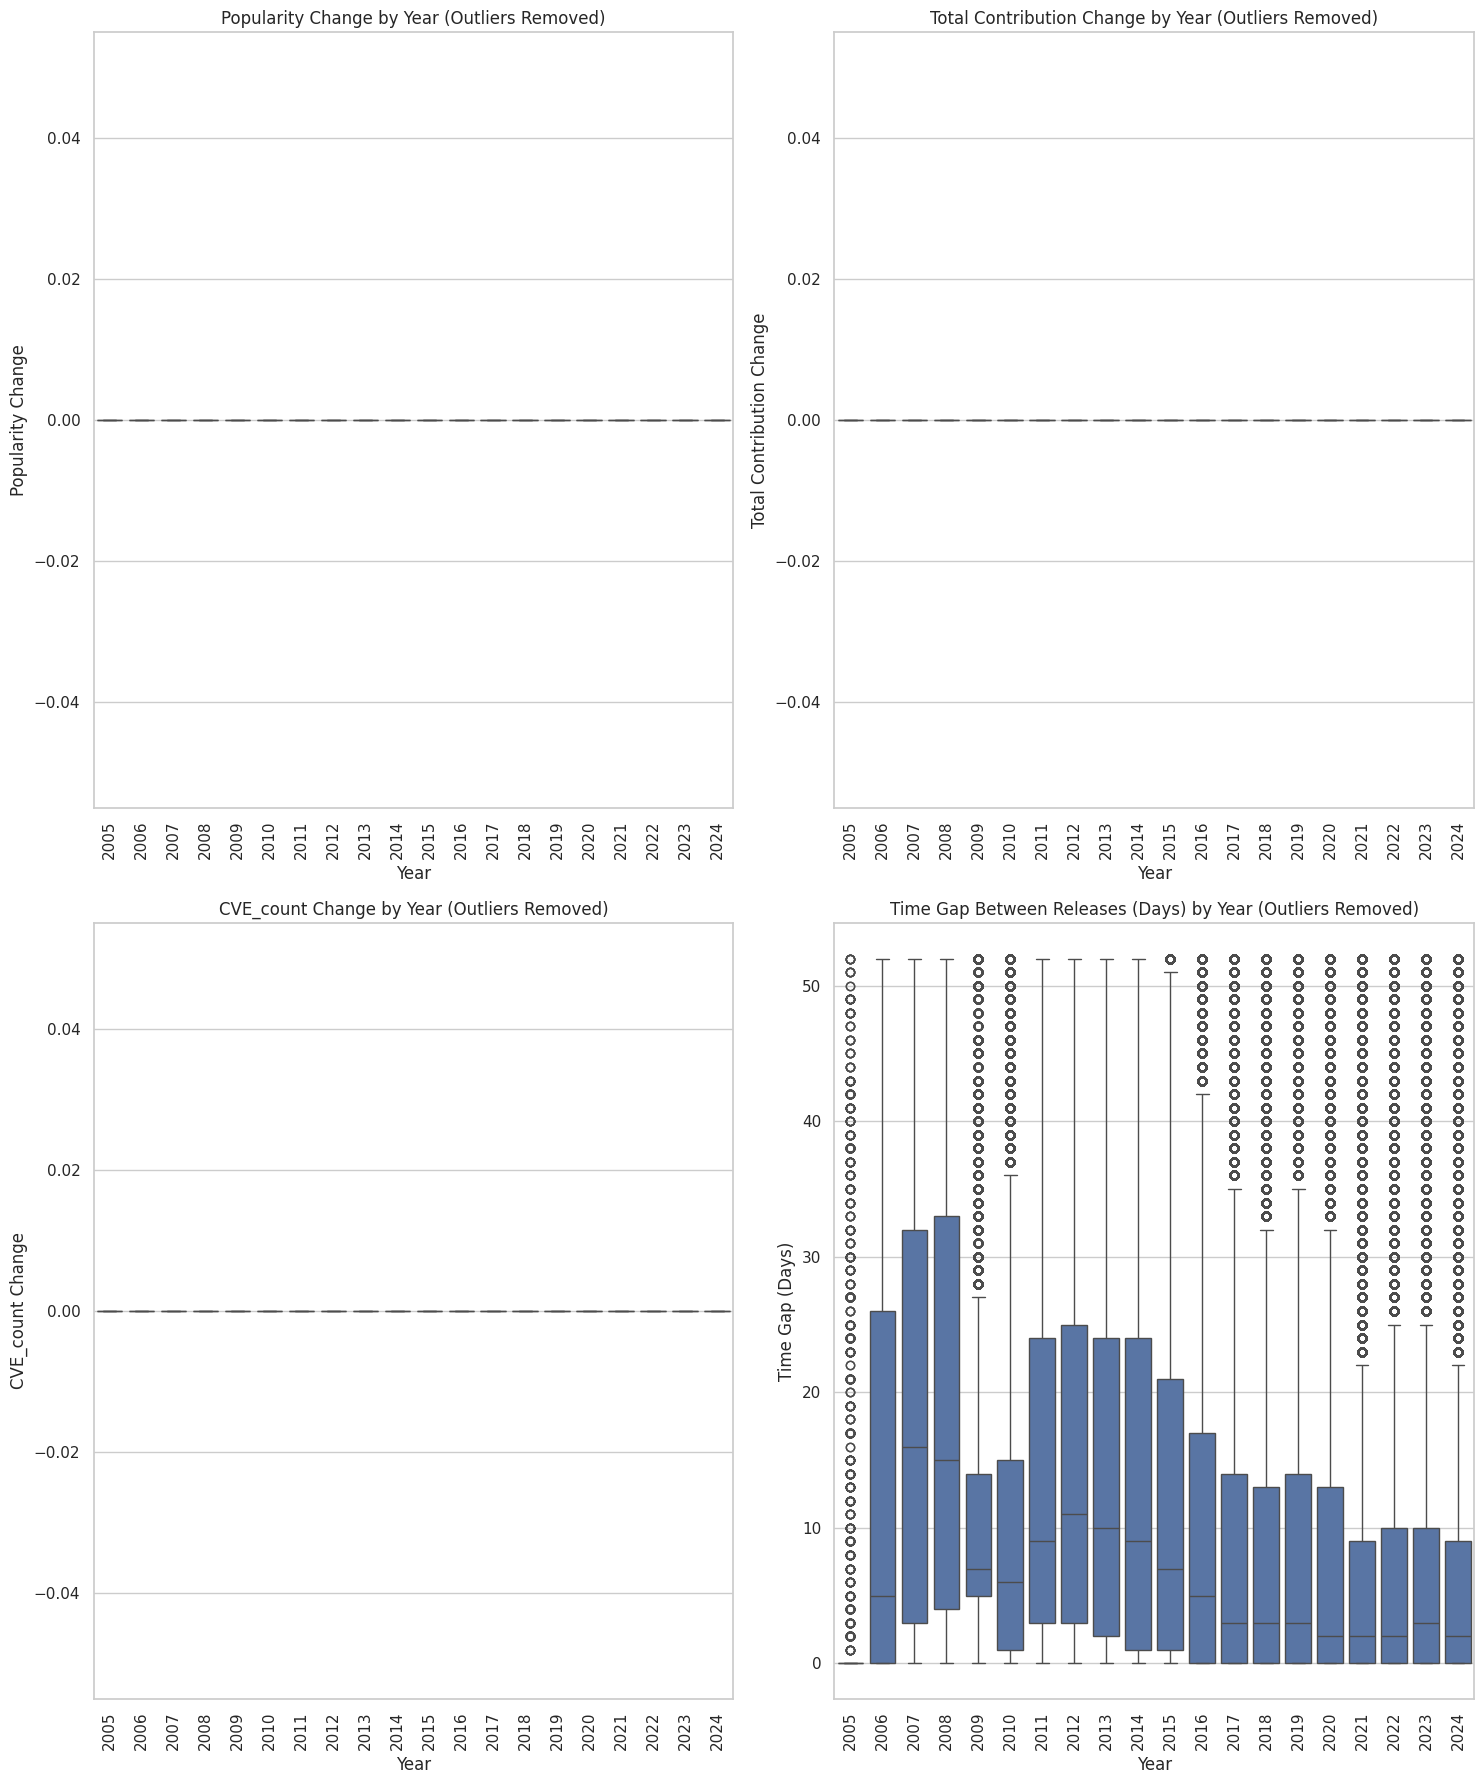

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the 'Timestamp' column is in numeric format
merged_dataset_sorted['Timestamp'] = pd.to_numeric(merged_dataset_sorted['Timestamp'], errors='coerce')

# Convert 'Timestamp' from Unix milliseconds to datetime format
merged_dataset_sorted['Timestamp'] = pd.to_datetime(merged_dataset_sorted['Timestamp'], unit='s')

# Extract Year from 'Timestamp' for grouping
merged_dataset_sorted['Year'] = merged_dataset_sorted['Timestamp'].dt.year

# Sort the dataset by 'artifact' and 'Timestamp' in chronological order
merged_dataset_sorted = merged_dataset_sorted.sort_values(by=['artifact', 'Timestamp'], ascending=[True, True])

# Calculate the absolute change between consecutive releases (no percentage)
merged_dataset_sorted['Popularity Change'] = merged_dataset_sorted.groupby('artifact')['Popularity'].diff()
merged_dataset_sorted['Total Contribution Change'] = merged_dataset_sorted.groupby('artifact')['Total Contribution'].diff()
merged_dataset_sorted['CVE_count Change'] = merged_dataset_sorted.groupby('artifact')['CVE_count'].diff()

# Calculate the time gap between consecutive releases in days
merged_dataset_sorted['Time Gap (Days)'] = merged_dataset_sorted.groupby('artifact')['Timestamp'].diff().dt.days

# Define a function to remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply the outlier removal to each relevant metric column
metrics = ['Popularity Change', 'Total Contribution Change', 'CVE_count Change', 'Time Gap (Days)']
for metric in metrics:
    merged_dataset_sorted = remove_outliers(merged_dataset_sorted, metric)

# Set up the plot style and figure size
sns.set(style="whitegrid")

# Create the subplots for each metric change and time gap
fig, axes = plt.subplots(2, 2, figsize=(15, 18))

# Plotting Popularity Change per Year
sns.boxplot(x='Year', y='Popularity Change', data=merged_dataset_sorted, ax=axes[0, 0])
axes[0, 0].set_title('Popularity Change by Year (Outliers Removed)')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=90)  # Rotate the x-axis labels by 90 degrees

# Plotting Total Contribution Change per Year
sns.boxplot(x='Year', y='Total Contribution Change', data=merged_dataset_sorted, ax=axes[0, 1])
axes[0, 1].set_title('Total Contribution Change by Year (Outliers Removed)')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=90)  # Rotate the x-axis labels by 90 degrees

# Plotting CVE_count Change per Year
sns.boxplot(x='Year', y='CVE_count Change', data=merged_dataset_sorted, ax=axes[1, 0])
axes[1, 0].set_title('CVE_count Change by Year (Outliers Removed)')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=90)  # Rotate the x-axis labels by 90 degrees

# Plotting Time Gap per Year
sns.boxplot(x='Year', y='Time Gap (Days)', data=merged_dataset_sorted, ax=axes[1, 1])
axes[1, 1].set_title('Time Gap Between Releases (Days) by Year (Outliers Removed)')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=90)  # Rotate the x-axis labels by 90 degrees

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [ ]:
labeled_artifacts_df['Maintenance_Status'].value_counts()


,count
Maintenance_Status,
Slightly Maintained,555187
Partially Maintained,79191
Fully Maintained,625


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Timestamp' from Unix milliseconds to datetime format
merged_dataset_sorted['Timestamp'] = pd.to_datetime(merged_dataset_sorted['Timestamp'], unit='ns')

# Extract Year from 'Timestamp' for grouping
merged_dataset_sorted['Year'] = merged_dataset_sorted['Timestamp'].dt.year

# Calculate the absolute change between consecutive releases (no percentage)
merged_dataset_sorted['Popularity Change'] = merged_dataset_sorted.groupby('artifact')['Popularity'].diff()
merged_dataset_sorted['Total Contribution Change'] = merged_dataset_sorted.groupby('artifact')['Total Contribution'].diff()
merged_dataset_sorted['CVE_count Change'] = merged_dataset_sorted.groupby('artifact')['CVE_count'].diff()

# Calculate the time gap between consecutive releases in days
merged_dataset_sorted['Time Gap (Days)'] = merged_dataset_sorted.groupby('artifact')['Timestamp'].diff().dt.days

# Set up the plot style and figure size
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

# Create the subplots for each metric change and time gap
fig, axes = plt.subplots(3, 2, figsize=(15, 18))

# Plotting Popularity Change per Year with log scale
sns.boxplot(x='Year', y='Popularity Change', data=merged_dataset_sorted, ax=axes[0, 0])
axes[0, 0].set_title('Popularity Change by Year')
axes[0, 0].set_yscale('log')  # Set log scale on y-axis

# Plotting Total Contribution Change per Year with log scale
sns.boxplot(x='Year', y='Total Contribution Change', data=merged_dataset_sorted, ax=axes[0, 1])
axes[0, 1].set_title('Total Contribution Change by Year')
axes[0, 1].set_yscale('log')  # Set log scale on y-axis

# Plotting CVE_count Change per Year with log scale
sns.boxplot(x='Year', y='CVE_count Change', data=merged_dataset_sorted, ax=axes[1, 0])
axes[1, 0].set_title('CVE_count Change by Year')
axes[1, 0].set_yscale('log')  # Set log scale on y-axis

# Plotting Time Gap per Year with log scale
sns.boxplot(x='Year', y='Time Gap (Days)', data=merged_dataset_sorted, ax=axes[1, 1])
axes[1, 1].set_title('Time Gap Between Releases (Days) by Year')
axes[1, 1].set_yscale('log')  # Set log scale on y-axis

# Rotate year labels to make them perpendicular and visible
for ax in axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)  # Rotate labels to be perpendicular
    ax.tick_params(axis='x', labelsize=10)  # Optional: Adjust font size

# Remove the empty subplot (if any)
axes[2, 0].axis('off')
axes[2, 1].axis('off')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the 'Timestamp' column is in numeric format
merged_dataset_sorted['Timestamp'] = pd.to_numeric(merged_dataset_sorted['Timestamp'], errors='coerce')

# Convert 'Timestamp' from Unix milliseconds to datetime format
merged_dataset_sorted['Timestamp'] = pd.to_datetime(merged_dataset_sorted['Timestamp'], unit='ns')

# Extract Year from 'Timestamp' for grouping
merged_dataset_sorted['Year'] = merged_dataset_sorted['Timestamp'].dt.year

# Sort the dataset by 'artifact' and 'Timestamp' in chronological order
merged_dataset_sorted = merged_dataset_sorted.sort_values(by=['artifact', 'Timestamp'], ascending=[True, True])

# Calculate the absolute change between consecutive releases (no percentage)
merged_dataset_sorted['Popularity Change'] = merged_dataset_sorted.groupby('artifact')['Popularity'].diff()
merged_dataset_sorted['Total Contribution Change'] = merged_dataset_sorted.groupby('artifact')['Total Contribution'].diff()
merged_dataset_sorted['CVE_count Change'] = merged_dataset_sorted.groupby('artifact')['CVE_count'].diff()

# Calculate the time gap between consecutive releases in days
merged_dataset_sorted['Time Gap (Days)'] = merged_dataset_sorted.groupby('artifact')['Timestamp'].diff().dt.days

# Set up the plot style and figure size
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

# Create the subplots for each metric change and time gap
fig, axes = plt.subplots(3, 2, figsize=(15, 18))

# Plotting Popularity Change per Year
sns.boxplot(x='Year', y='Popularity Change', data=merged_dataset_sorted, ax=axes[0, 0])
axes[0, 0].set_title('Popularity Change by Year')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=90)  # Rotate the x-axis labels by 90 degrees

# Plotting Total Contribution Change per Year
sns.boxplot(x='Year', y='Total Contribution Change', data=merged_dataset_sorted, ax=axes[0, 1])
axes[0, 1].set_title('Total Contribution Change by Year')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=90)  # Rotate the x-axis labels by 90 degrees

# Plotting CVE_count Change per Year
sns.boxplot(x='Year', y='CVE_count Change', data=merged_dataset_sorted, ax=axes[1, 0])
axes[1, 0].set_title('CVE_count Change by Year')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=90)  # Rotate the x-axis labels by 90 degrees

# Plotting Time Gap per Year
sns.boxplot(x='Year', y='Time Gap (Days)', data=merged_dataset_sorted, ax=axes[1, 1])
axes[1, 1].set_title('Time Gap Between Releases (Days) by Year')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=90)  # Rotate the x-axis labels by 90 degrees

# Remove the empty subplot (if any)
axes[2, 0].axis('off')
axes[2, 1].axis('off')

# Show the plot
plt.tight_layout()
plt.show()


NameError: name 'merged_dataset_sorted' is not defined